In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


# Import

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from google.colab import files
import io
from google.colab import drive
import pandas as pd
import numpy as np
import statistics
import datetime 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics.scorer import make_scorer
from collections import Counter
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import tree
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


2.5.0


# File Upload

In [ ]:
from google.colab import files
# uploaded = files.upload()
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Data Set"

BACR.csv  BZBK.csv  CBID.csv  GS.csv  NRUC.csv	PSEC.csv  StaticCSV.csv


# CSV to DataFrame


In [ ]:
import pandas as pd
import numpy as np
pd.__version__

# static = pd.read_csv(io.StringIO(uploaded['StaticCSV.csv'].decode('utf-8')))
# bzbk = pd.read_csv(io.StringIO(uploaded['BZBK.csv'].decode('utf-8')))
# cbid = pd.read_csv(io.StringIO(uploaded['CBID.csv'].decode('utf-8')))
# gs = pd.read_csv(io.StringIO(uploaded['GS.csv'].decode('utf-8')))
# nruc = pd.read_csv(io.StringIO(uploaded['NRUC.csv'].decode('utf-8')))
# psec = pd.read_csv(io.StringIO(uploaded['PSEC.csv'].decode('utf-8')))
# bacr = pd.read_csv(io.StringIO(uploaded['BACR.csv'].decode('utf-8')))

static = pd.read_csv("/content/drive/MyDrive/Data Set/StaticCSV.csv")
bzbk = pd.read_csv("/content/drive/MyDrive/Data Set/BZBK.csv")
cbid = pd.read_csv("/content/drive/MyDrive/Data Set/CBID.csv")
gs = pd.read_csv("/content/drive/MyDrive/Data Set/GS.csv")
nruc = pd.read_csv("/content/drive/MyDrive/Data Set/NRUC.csv")
psec = pd.read_csv("/content/drive/MyDrive/Data Set/PSEC.csv")
bacr = pd.read_csv("/content/drive/MyDrive/Data Set/BACR.csv")

In [ ]:
static['Maturity']= pd.to_datetime(static['Maturity'],errors='coerce', format='%m/%d/%Y')
bzbk['Date']= pd.to_datetime(bzbk['Date'],errors='coerce', format='%d/%m/%Y')
cbid['Date']= pd.to_datetime(cbid['Date'],errors='coerce',format='%d/%m/%Y')
gs['Date']= pd.to_datetime(gs['Date'],errors='coerce', format='%d/%m/%Y')
nruc['Date']= pd.to_datetime(nruc['Date'],errors='coerce', format='%d/%m/%Y')
psec['Date']= pd.to_datetime(psec['Date'],errors='coerce', format='%d/%m/%Y')
bacr['Date']= pd.to_datetime(bacr['Date'],errors='coerce', format='%d/%m/%Y')

# Visualising Data

210.696
214.98
129.303


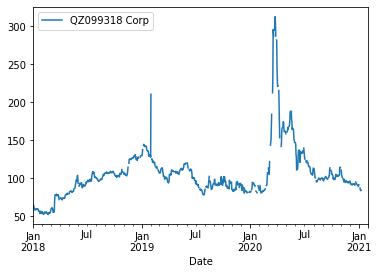

In [ ]:
cbid.plot(x='Date', y= 'QZ099318 Corp')
print(cbid.loc[396, 'QZ099318 Corp'])
print(cbid.loc[396, 'QZ506838 Corp'])

print(psec.loc[639, 'EJ851461 Corp'])

Raw:


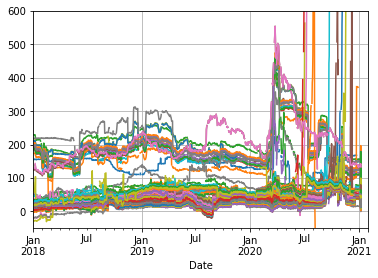

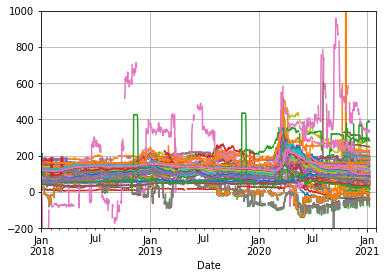

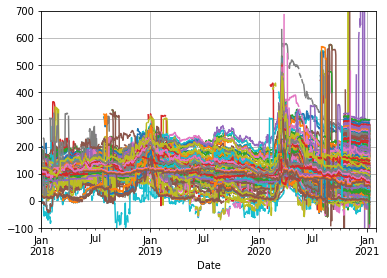

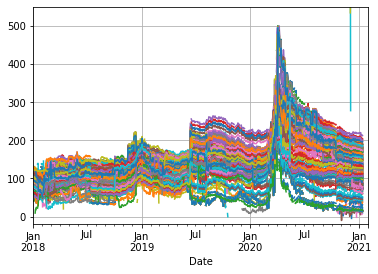

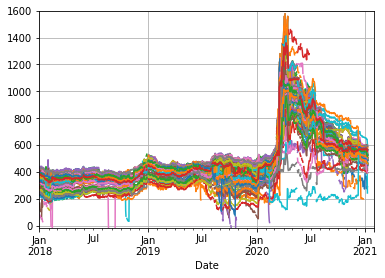

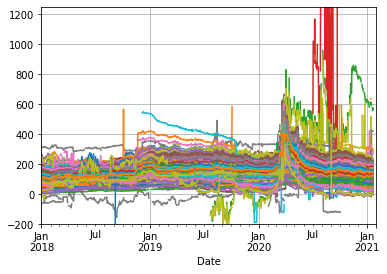

In [ ]:
print('Raw:')
bzbk.set_index('Date').plot(grid = True, legend = False, ylim = ( -50, 600))
cbid.set_index('Date').plot(grid = True, legend = False, ylim = ( -200, 1000))
gs.set_index('Date').plot(grid = True, legend = False, ylim = ( -100, 700))
nruc.set_index('Date').plot(grid = True, legend = False, ylim = ( -20, 550))
psec.set_index('Date').plot(grid = True, legend = False, ylim = ( -20, 1600))
bacr.set_index('Date').plot(grid = True, legend = False, ylim = ( -200, 1250))


# Dropping Bonds

Cleaned:


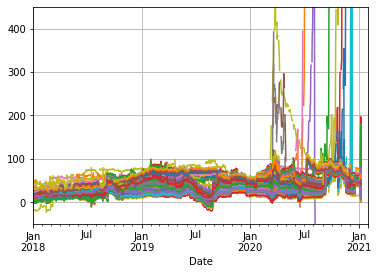

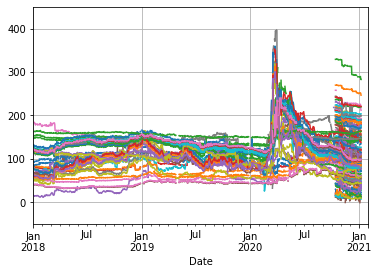

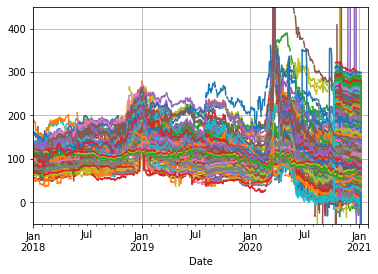

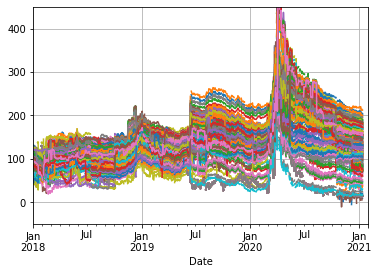

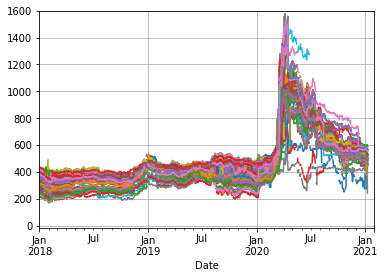

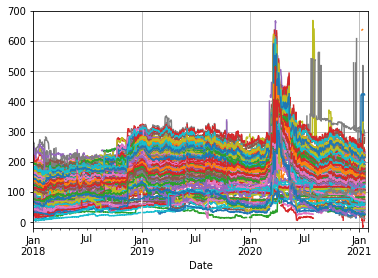

In [ ]:

bzbk_drop = bzbk.drop(['EJ783442 Corp', 'EK637231 Corp', 'EI043155 Corp', \
                       'EJ685273 Corp', 'EJ742907 Corp', 'EK983000 Corp', \
                       'EJ847755 Corp', 'UV859523 Corp', 'EK982922 Corp', \
                       'QJ126371 Corp', 'EJ733141 Corp', 'EJ749109 Corp', \
                       'UV890638 Corp', 'EJ835789 Corp', 'EJ697242 Corp', \
                       'UV587246 Corp', 'EJ743477 Corp', 'AO897762 Corp', \
                       'EK732503 Corp', 'EJ762607 Corp', 'QJ210706 Corp', \
                       'QJ152593 Corp', 'AP448867 Corp'], axis=1)

cbid_drop = cbid.drop(['EK143534 Corp', 'EF531147 Corp', 'EK112497 Corp', \
                       'EJ999798 Corp', 'EJ926334 Corp', 'EK143534 Corp', \
                       'EK006565 Corp', 'EK006547 Corp', 'EK589492 Corp', \
                       'QZ388196 Corp', 'QJ221473 Corp', 'EI342886 Corp', \
                       'EK112497 Corp', 'LW544865 Corp', 'QZ549248 Corp', \
                       'EJ999798 Corp', 'EJ926334 Corp', 'EK647533 Corp', \
                       'EK143534 Corp', 'EF082292 Corp', 'LW471192 Corp', \
                       'AO584163 Corp', 'AN077116 Corp', 'EK006565 Corp', \
                       'EK006547 Corp', 'AN751483 Corp', 'EF531147 Corp', \
                       'EK492827 Corp', 'EF300335 Corp', 'JV956668 Corp', \
                       'UV888227 Corp', 'AL531142 Corp', 'EF300335 Corp', \
                       'EK492827 Corp', 'LW544865 Corp', 'EH301985 Corp', \
                       'EH301985 Corp', 'QZ556912 Corp', 'EJ503911 Corp', \
                       'UV887597 Corp', 'JV868916 Corp', 'AP954222 Corp', \
                       ], axis=1)
# QZ099318 Corp, QZ506838 Corp jan spike, AP954222 Corp nov spike
cbid_drop.loc[396, 'QZ099318 Corp'] = np.NaN
cbid_drop.loc[396, 'QZ506838 Corp'] = np.NaN

gs_drop = gs.drop(['EI807319 Corp', 'EI795482 Corp', 'EJ025463 Corp', \
                   'EJ025519 Corp', 'EI767642 Corp', 'EI760043 Corp', \
                   'EI795470 Corp', 'EI775681 Corp', 'EI760051 Corp', \
                   'EI788198 Corp', 'EJ294058 Corp', 'EJ576498 Corp', \
                   'AM315473 Corp', 'AM315459 Corp', 'AL090158 Corp', \
                   'EI463463 Corp', 'EJ761802 Corp', 'EI879574 Corp', \
                   'EJ328771 Corp', 'EJ320281 Corp', 'EJ320501 Corp', \
                   'EJ297121 Corp', 'AL090335 Corp', 'EJ298704 Corp', \
                   'QZ541576 Corp', 'EI907213 Corp', 'EJ946307 Corp', \
                   'EJ524078 Corp', 'EJ330136 Corp', 'JK161102 Corp', \
                   'JK297986 Corp', 'EJ289996 Corp', 'UV312768 Corp'], axis=1)

nruc_drop = nruc.drop(['EJ638584 Corp', 'EI892412 Corp', 'EI914529 Corp', 'QJ226276 Corp'], axis=1)

psec_drop = psec.drop(['EJ826682 Corp', 'EJ946283 Corp', 'EK069321 Corp', \
                   'AL473850 Corp', 'EK157213 Corp', 'EJ733085 Corp', \
                   'AL746911 Corp', 'AL601930 Corp', 'EJ758669 Corp', \
                   'EJ674162 Corp', 'EJ443691 Corp', 'EJ649517 Corp', \
                   'AN186890 Corp', 'EK093946 Corp', 'EJ784292 Corp', \
                   'EK006523 Corp', 'EJ452011 Corp' ], axis=1)
                  #  'EI795470 Corp', 'EI775681 Corp', 'EI760051 Corp', \
                  #  'EI788198 Corp', 'EJ294058 Corp', 'EJ576498 Corp', \
psec_drop.loc[639, 'EJ851461 Corp']= np.NaN

bacr_drop = bacr.drop(['EC181877 Corp', 'EI736882 Corp', 'EI737094 Corp', \
                   'EI657859 Corp', 'EJ596086 Corp', 'EI886360 Corp', \
                   'AQ125271 Corp', 'AM853163 Corp', 'AM659162 Corp', \
                   'AN646018 Corp', 'AP251079 Corp', 'EI688785 Corp', \
                   'EI792790 Corp', 'EI680481 Corp', 'EI785452 Corp', \
                   'EG911485 Corp', 'EI455957 Corp', 'AP237524 Corp' ], axis=1)

print('Cleaned:')
bzbk_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -50, 450))
cbid_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -50, 450))
gs_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -50, 450))
nruc_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -50, 450))
psec_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -20, 1600))
bacr_drop.set_index('Date').plot(grid = True, legend = False, ylim = ( -20, 700))

In [ ]:
zspread = pd.concat([bzbk_drop, cbid_drop, gs_drop, nruc_drop, psec_drop, bacr_drop], axis=1)
zspread = zspread.loc[:,~zspread.columns.duplicated()]
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option('all')
# pd.set_option("display.max_columns", None)
zspread = zspread[zspread['Date'].dt.dayofweek < 5]

In [ ]:
static_filtered = static.copy()
static_filtered = static_filtered.drop(static_filtered.columns[[1, 12, 17, 18, 19, 20, 22]], axis=1)
static_filtered.head()
static_filtered_na = static_filtered.dropna(subset = ['Numerical Average', 'Amount Issued', 'Maturity'])

In [ ]:
static_filtered_na.shape
print(static_filtered_na)
print(zspread)
static_filtered_na.dtypes
pd.set_option("display.max_columns", None)
print(static_filtered_na)

            Data ID  Coupon   Maturity  ...  GBP  OTHER  Numerical Average
3     EJ685273 Corp   3.000 2022-12-30  ...    0      0               70.0
5     EK983000 Corp   2.250 2025-06-06  ...    0      0               72.5
6     AP761165 Corp   1.130 2029-11-06  ...    0      0               77.5
8     UV859523 Corp   3.085 2030-09-18  ...    0      0               72.5
9     EK982922 Corp   1.750 2023-06-06  ...    0      0               72.5
...             ...     ...        ...  ...  ...    ...                ...
2259  EF531147 Corp   4.110 2035-11-16  ...    0      0               70.0
2261  EF801785 Corp   4.390 2031-11-03  ...    0      1               70.0
2262  EJ781396 Corp   5.160 2023-08-09  ...    0      1               70.0
2263  EJ814435 Corp   5.280 2023-09-10  ...    0      1               70.0
2264  QJ616465 Corp   4.050 2035-11-10  ...    0      0               67.5

[1650 rows x 16 columns]
           Date  AP761165 Corp  ...  EI892308 Corp  EI924494 Corp
0    201

/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [ ]:
pd.reset_option('all')
print(bzbk)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

           Date  EJ783442 Corp  ...  EK427219 Corp  EK419857 Corp
0    2018-01-01            NaN  ...            NaN            NaN
1    2018-01-02            NaN  ...         13.809         18.452
2    2018-01-03        155.369  ...         13.514         18.459
3    2018-01-04        156.221  ...         13.700         19.107
4    2018-01-05        155.686  ...         14.227         19.309
...         ...            ...  ...            ...            ...
1122 2021-01-27            NaN  ...            NaN            NaN
1123 2021-01-28            NaN  ...            NaN            NaN
1124 2021-01-29            NaN  ...            NaN            NaN
1125 2021-01-30            NaN  ...            NaN            NaN
1126 2021-01-31            NaN  ...            NaN            NaN

[1127 rows x 180 columns]


/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Functions


In [ ]:
import datetime 
print(zspread.iat[800, 0])
# 2020-03-11 00:00:00
print(zspread.iat[730, 0])
# 2020-01-01 00:00:00
print(zspread.iat[522, 0])

2021-01-25 00:00:00
2020-10-19 00:00:00
2020-01-01 00:00:00


In [ ]:
def days_to_maturity(date_maturity):
  date_current = zspread.iat[(date_i + date_delta), 0]
  return (date_maturity - date_current).days

def days_to_maturity_oos(date_maturity):
  date_current = zspread.iat[(date_i + date_delta + 1), 0]
  return (date_maturity - date_current).days

In [ ]:
def class_score(y_test, y_pred):
  y_test_classification = [np.sign(i) for i in y_test]
  y_pred_classification = [np.sign(i) for i in y_pred]
  acc = accuracy_score(y_test_classification, y_pred_classification, normalize=True)
  return acc


In [ ]:
import keras.backend as K

def customLoss(yTrue,yPred):
  diff = yTrue - yPred
  truesign = K.sign(yTrue)
  predsign = K.sign(yPred)
  weight = (truesign * predsign * -1) + 2
  #use some kind of loss here, such as mse or mae, or pick one from keras
  #using mse:
  return K.mean(weight*K.square(diff))

# Static Data Models

In [ ]:
begin_time = datetime.datetime.now()
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


start_index = 1
end_index = 522

for date_delta in range(1, 8):
# for date_delta in range(3, 8): 
  print(f'Delta = {date_delta}')
  ## START LOOP
  # linreg_mse = []
  # linreg_r2 = []
  # linreg_acc = []

  # ridge_alpha = []
  # lasso_alpha = []
  # elastic_alpha = []
  # elastic_lratio = []

  # ridge_mse = []
  # ridge_r2 = []
  # ridge_acc = []

  # lasso_mse = []
  # lasso_r2 = []
  # lasso_acc = []

  # elastic_mse = []
  # elastic_r2 = []
  # elastic_acc = []

  # tree_mse = []
  # tree_r2 = []
  # tree_acc = []

  # logistic_mse = []
  # logistic_r2 = []
  # logistic_acc = []

  # log_tree_mse = []
  # log_tree_r2 = []
  # log_tree_acc = []

  ensemble_10_mse = []
  ensemble_10_r2 = []
  ensemble_10_acc = []
  ensemble_50_mse = []
  ensemble_50_r2 = []
  ensemble_50_acc = []
  ensemble_100_mse = []
  ensemble_100_r2 = []
  ensemble_100_acc = []

  # nn_1_8_relu_mse = []
  # nn_1_8_relu_r2 = []
  # nn_1_8_relu_acc = []

  # nn_2_8_relu_mse = []
  # nn_2_8_relu_r2 = []
  # nn_2_8_relu_acc = []

  # nn_1_16_relu_mse = []
  # nn_1_16_relu_r2 = []
  # nn_1_16_relu_acc = []

  # nn_2_16_relu_mse = []
  # nn_2_16_relu_r2 = []
  # nn_2_16_relu_acc = []

  # nn_1_32_relu_mse = []
  # nn_1_32_relu_r2 = []
  # nn_1_32_relu_acc = []

  # nn_2_32_relu_mse = []
  # nn_2_32_relu_r2 = []
  # nn_2_32_relu_acc = []

  # nn_1_8_sig_mse = []
  # nn_1_8_sig_r2 = []
  # nn_1_8_sig_acc = []

  # nn_2_8_sig_mse = []
  # nn_2_8_sig_r2 = []
  # nn_2_8_sig_acc = []

  # nn_1_16_sig_mse = []
  # nn_1_16_sig_r2 = []
  # nn_1_16_sig_acc = []

  # nn_2_16_sig_mse = []
  # nn_2_16_sig_r2 = []
  # nn_2_16_sig_acc = []

  # nn_1_32_sig_mse = []
  # nn_1_32_sig_r2 = []
  # nn_1_32_sig_acc = []

  # nn_2_32_sig_mse = []
  # nn_2_32_sig_r2 = []
  # nn_2_32_sig_acc = []
  
  # nn_1_8_tanh_mse = []
  # nn_1_8_tanh_r2 = []
  # nn_1_8_tanh_acc = []

  # nn_2_8_tanh_mse = []
  # nn_2_8_tanh_r2 = []
  # nn_2_8_tanh_acc = []

  # nn_1_16_tanh_mse = []
  # nn_1_16_tanh_r2 = []
  # nn_1_16_tanh_acc = []

  # nn_2_16_tanh_mse = []
  # nn_2_16_tanh_r2 = []
  # nn_2_16_tanh_acc = []

  # nn_1_32_tanh_mse = []
  # nn_1_32_tanh_r2 = []
  # nn_1_32_tanh_acc = []

  # nn_2_32_tanh_mse = []
  # nn_2_32_tanh_r2 = []
  # nn_2_32_tanh_acc = []

  # date_delta = 5
  # print(date_delta)
  count_row = zspread.shape[0]  # Gives number of rows
  count_col = zspread.shape[1]  # Gives number of columns

  # for date_i in range(start_index, 100 - date_delta):
  for date_i in range(start_index, end_index - date_delta):
  # for date_i in range(1, 5):
    # print(date_i)
    # x = pd.DataFrame(columns=static_filtered_na.columns)
    y = []
    x_toappend = []

    for bond_i in range(1, count_col):
      after = zspread.iat[(date_i + date_delta), bond_i]
      before = zspread.iat[date_i, bond_i]
      
      if not pd.isnull(before) and not pd.isnull(after):
        zsprd_delta = after - before
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y.append(zsprd_delta)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_toappend.append(x_row)
    # print(x.dtypes)
    # print(x.shape)
    # print(len(y))
    if y == []:
      continue 

    x = pd.concat(x_toappend, ignore_index= True)
    x['y'] = y
    x.drop(x[np.abs(x.y-x.y.mean()) >= (2*x.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y = x['y'].tolist()
    # print(len(y))

    x = x.drop(['Data ID', 'y'], axis=1)

    x['Maturity'] = x['Maturity'].apply(days_to_maturity)

    x = x.apply(pd.to_numeric)

    x_dropped = x.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_dropped_normalised = preprocessing.normalize(x_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_dropped_scaled = x_dropped
    # print(x_dropped_scaled)
    x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)



    X_train, X_test, y_train, y_test = train_test_split(x_dropped_scaled, y, test_size=0.2, random_state=0)
    # # X_dropped_train, X_dropped_test, y_train, y_test = train_test_split(x_dropped, y, test_size=0.2, random_state=0)
    # regressor = LinearRegression()  
    # regressor.fit(X_train, y_train)
    # # print(regressor.intercept_)
    # y_pred = regressor.predict(X_test)
    # # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # # print(results)
    # # print('Coefficients: \n', regressor.coef_)
    # # print('Mean squared error: %.2f'
    # #       % mean_squared_error(y_test, y_pred))
    # # # The coefficient of determination: 1 is perfect prediction
    # # print('Coefficient of determination: %.2f'
    # #       % r2_score(y_test, y_pred))
    # acc = class_score(y_test, y_pred)
    # # print('Accuracy score: %.2f'
    # #       % accuracy_score(y_test_classification, y_pred_classification, normalize=True))
    # linreg_mse.append(mse)
    # linreg_r2.append(r2)
    # linreg_acc.append(acc)
    # # print(regressor.score(x_dropped_scaled, y))
    # # print(f'Lin Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100], store_cv_values= False)
    # regressorcv.fit(x_dropped_scaled, y)
    # # print(regressorcv.alpha_)
    # # print(regressorcv.cv_values_)
    
    # # print(regressorcv.score(x_dropped_scaled, y))

    # # regressor = LinearRegression()
    # # scorer = {'MSE': 'neg_mean_squared_error', 'R2': 'r2', 'acc': make_scorer(class_score)}
    # # scores = cross_validate(regressor, x_dropped_scaled, y, scoring=scorer, cv=5)
    # # print(scores)
    # regressor = linear_model.Ridge(alpha = regressorcv.alpha_, random_state = 0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ridge_alpha.append(regressorcv.alpha_)
    # ridge_mse.append(mse)
    # ridge_r2.append(r2)
    # ridge_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Rid Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.LassoCV(cv=5, random_state=0)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.Lasso(alpha = regressorcv.alpha_, random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # lasso_alpha.append(regressorcv.alpha_)
    # lasso_mse.append(mse)
    # lasso_r2.append(r2)
    # lasso_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= [.1, .5, .7, .9, .95, .99, 1])
    # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= .5)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.ElasticNet(alpha = .5, l1_ratio = regressorcv.l1_ratio_ , random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # elastic_alpha.append(regressorcv.alpha_)
    # elastic_lratio.append(regressorcv.l1_ratio_)
    # elastic_mse.append(mse)
    # elastic_r2.append(r2)
    # elastic_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Ela Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # clf = tree.DecisionTreeRegressor()
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # tree_mse.append(mse)
    # tree_r2.append(r2)
    # tree_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_10_mse.append(mse)
    ensemble_10_r2.append(r2)
    ensemble_10_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=50)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_50_mse.append(mse)
    ensemble_50_r2.append(r2)
    ensemble_50_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=100)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_100_mse.append(mse)
    ensemble_100_r2.append(r2)
    ensemble_100_acc.append(acc)



    # x_scaled = x
    # x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # x_np = x_scaled.to_numpy()
    # y_np = np.array(y)
    # X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_relu_mse.append(mse)
    # nn_1_8_relu_r2.append(r2)
    # nn_1_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_relu_mse.append(mse)
    # nn_1_16_relu_r2.append(r2)
    # nn_1_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),  
    #     tf.keras.layers.Dense(8, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_relu_mse.append(mse)
    # nn_2_8_relu_r2.append(r2)
    # nn_2_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),  
    #     tf.keras.layers.Dense(16, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_relu_mse.append(mse)
    # nn_2_16_relu_r2.append(r2)
    # nn_2_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),  
    #     tf.keras.layers.Dense(32, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_relu_mse.append(mse)
    # nn_2_32_relu_r2.append(r2)
    # nn_2_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_sig_mse.append(mse)
    # nn_1_8_sig_r2.append(r2)
    # nn_1_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_sig_mse.append(mse)
    # nn_1_16_sig_r2.append(r2)
    # nn_1_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_sig_mse.append(mse)
    # nn_1_32_sig_r2.append(r2)
    # nn_1_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),  
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_sig_mse.append(mse)
    # nn_2_8_sig_r2.append(r2)
    # nn_2_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),  
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_sig_mse.append(mse)
    # nn_2_16_sig_r2.append(r2)
    # nn_2_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),  
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_sig_mse.append(mse)
    # nn_2_32_sig_r2.append(r2)
    # nn_2_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(8, activation='tanh'),                      
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_tanh_mse.append(mse)
    # nn_1_8_tanh_r2.append(r2)
    # nn_1_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_tanh_mse.append(mse)
    # nn_1_16_tanh_r2.append(r2)
    # nn_1_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_tanh_mse.append(mse)
    # nn_1_32_tanh_r2.append(r2)
    # nn_1_32_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='tanh'),  
    #     tf.keras.layers.Dense(8, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_tanh_mse.append(mse)
    # nn_2_8_tanh_r2.append(r2)
    # nn_2_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),  
    #     tf.keras.layers.Dense(16, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_tanh_mse.append(mse)
    # nn_2_16_tanh_r2.append(r2)
    # nn_2_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),  
    #     tf.keras.layers.Dense(32, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_tanh_mse.append(mse)
    # nn_2_32_tanh_r2.append(r2)
    # nn_2_32_tanh_acc.append(acc)

    # y_classification = [np.sign(i) for i in y]
    # X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(x_dropped_scaled, y_classification, test_size=0.2, random_state=0)

    # if len(Counter(y_class_train).keys()) > 1:
      
    #   regressor = linear_model.LogisticRegression(random_state=0)
    #   regressor.fit(X_class_train, y_class_train)
    #   y_pred = regressor.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   logistic_mse.append(mse)
    #   logistic_r2.append(r2)
    #   logistic_acc.append(acc)
    #   # print(regressorcv.alpha_)
    #   # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    #   clf = tree.DecisionTreeClassifier()
    #   clf = clf.fit(X_class_train, y_class_train)
    #   y_pred = clf.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   log_tree_mse.append(mse)
    #   log_tree_r2.append(r2)
    #   log_tree_acc.append(acc)

  ## Print final results ## 
  # # print(f'Delta = {date_delta}')
  # print(f'Lin Regression: Mean MSE = {statistics.mean(linreg_mse):.2f}, \
  # Mean R2 = {statistics.mean(linreg_r2):.2f}, Mean Accuracy = {statistics.mean(linreg_acc):.2f}')
  # print(f'Rid Regression: Mean MSE = {statistics.mean(ridge_mse):.2f}, \
  # Mean R2 = {statistics.mean(ridge_r2):.2f}, Mean Accuracy = {statistics.mean(ridge_acc):.2f}')
  # print(f'Las Regression: Mean MSE = {statistics.mean(lasso_mse):.2f}, \
  # Mean R2 = {statistics.mean(lasso_r2):.2f}, Mean Accuracy = {statistics.mean(lasso_acc):.2f}')
  # print(f'Ela Regression: Mean MSE = {statistics.mean(elastic_mse):.2f}, \
  # Mean R2 = {statistics.mean(elastic_r2):.2f}, Mean Accuracy = {statistics.mean(elastic_acc):.2f}')

  # print(f'Ridge: Alpha = {Counter(ridge_alpha)}')
  # # print(f'Lasso: Alpha = {Counter(lasso_alpha)}')
  # # print(f'Elastic: Alpha = {Counter(elastic_alpha)}')
  # print(f'Elastic: L1 ratio = {Counter(elastic_lratio)}')

  # print(f'nn_1_8_relu: Mean MSE = {statistics.mean(nn_1_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relu_acc):.2f}')
  # print(f'nn_2_8_relu: Mean MSE = {statistics.mean(nn_2_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relu_acc):.2f}')
  # print(f'nn_1_16_relu: Mean MSE = {statistics.mean(nn_1_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relu_acc):.2f}')
  # print(f'nn_2_16_relu: Mean MSE = {statistics.mean(nn_2_16_relu_mse):.2f}, \
  # # Mean R2 = {statistics.mean(nn_2_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_relu_acc):.2f}')
  # print(f'nn_1_32_relu: Mean MSE = {statistics.mean(nn_1_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_relu_acc):.2f}')
  # print(f'nn_2_32_relu: Mean MSE = {statistics.mean(nn_2_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_relu_acc):.2f}')

  # print(f'nn_1_8_sig: Mean MSE = {statistics.mean(nn_1_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_sig_acc):.2f}')
  # print(f'nn_2_8_sig: Mean MSE = {statistics.mean(nn_2_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_sig_acc):.2f}')
  # print(f'nn_1_16_sig: Mean MSE = {statistics.mean(nn_1_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_sig_acc):.2f}')
  # print(f'nn_2_16_sig: Mean MSE = {statistics.mean(nn_2_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_sig_acc):.2f}')
  # print(f'nn_1_32_sig: Mean MSE = {statistics.mean(nn_1_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_sig_acc):.2f}')
  # print(f'nn_2_32_sig: Mean MSE = {statistics.mean(nn_2_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_sig_acc):.2f}')

  # print(f'nn_1_8_tanh: Mean MSE = {statistics.mean(nn_1_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_tanh_acc):.2f}')
  # print(f'nn_2_8_tanh: Mean MSE = {statistics.mean(nn_2_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_tanh_acc):.2f}')
  # print(f'nn_1_16_tanh: Mean MSE = {statistics.mean(nn_1_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_tanh_acc):.2f}')
  # print(f'nn_2_16_tanh: Mean MSE = {statistics.mean(nn_2_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_tanh_acc):.2f}')
  # print(f'nn_1_32_tanh: Mean MSE = {statistics.mean(nn_1_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_tanh_acc):.2f}')
  # print(f'nn_2_32_tanh: Mean MSE = {statistics.mean(nn_2_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_tanh_acc):.2f}')

  # print(f'Tree: Mean MSE = {statistics.mean(tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(tree_r2):.2f}, Mean Accuracy = {statistics.mean(tree_acc):.2f}')
  # print(f'Logistic: Mean MSE = {statistics.mean(logistic_mse):.2f}, \
  # Mean R2 = {statistics.mean(logistic_r2):.2f}, Mean Accuracy = {statistics.mean(logistic_acc):.2f}')
  # print(f'Log Tree: Mean MSE = {statistics.mean(log_tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(log_tree_r2):.2f}, Mean Accuracy = {statistics.mean(log_tree_acc):.2f}')
  print(f'ensemble_10: Mean MSE = {statistics.mean(ensemble_10_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_10_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_10_acc):.2f}')
  print(f'ensemble_50: Mean MSE = {statistics.mean(ensemble_50_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_50_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_50_acc):.2f}')
  print(f'ensemble_100: Mean MSE = {statistics.mean(ensemble_100_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_100_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_100_acc):.2f}')

  print(datetime.datetime.now() - begin_time)
  ## END LOOP ##



Delta = 1
ensemble_10: Mean MSE = 3.35,   Mean R2 = 0.51, Mean Accuracy = 0.88
ensemble_50: Mean MSE = 3.23,   Mean R2 = 0.54, Mean Accuracy = 0.88
ensemble_100: Mean MSE = 3.19,   Mean R2 = 0.54, Mean Accuracy = 0.88
0:19:11.492547
Delta = 2
ensemble_10: Mean MSE = 6.88,   Mean R2 = 0.52, Mean Accuracy = 0.87
ensemble_50: Mean MSE = 6.59,   Mean R2 = 0.54, Mean Accuracy = 0.87
ensemble_100: Mean MSE = 6.51,   Mean R2 = 0.55, Mean Accuracy = 0.87
0:38:21.105813
Delta = 3
ensemble_10: Mean MSE = 10.29,   Mean R2 = 0.50, Mean Accuracy = 0.87
ensemble_50: Mean MSE = 9.84,   Mean R2 = 0.53, Mean Accuracy = 0.87
ensemble_100: Mean MSE = 9.72,   Mean R2 = 0.53, Mean Accuracy = 0.87
0:57:25.447808
Delta = 4
ensemble_10: Mean MSE = 13.80,   Mean R2 = 0.51, Mean Accuracy = 0.87
ensemble_50: Mean MSE = 12.89,   Mean R2 = 0.54, Mean Accuracy = 0.87
ensemble_100: Mean MSE = 12.83,   Mean R2 = 0.55, Mean Accuracy = 0.87
1:16:23.226904
Delta = 5
ensemble_10: Mean MSE = 16.86,   Mean R2 = 0.46, Mean 

In [ ]:
print(f'Lasso Alpha Mean = {statistics.mean(lasso_alpha):.2f}, Elastic Alpha Mean = {statistics.mean(elastic_alpha):.2f}')

In [ ]:
print(x)
x.dtypes


x.isnull().sum().sum()
is_NaN = x.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = x[row_has_NaN]
print(rows_with_NaN)
Counter(y_classification).keys()

# Time Variant (In sample) (overlap = 0)


In [ ]:
begin_time = datetime.datetime.now()
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


start_index = 1
end_index = 522

for date_delta in range(1, 8):
# for date_delta in range(7, 8): 
  print(f'Delta = {date_delta}')
  ## START LOOP
  # linreg_mse = []
  # linreg_r2 = []
  # linreg_acc = []

  # ridge_alpha = []
  # lasso_alpha = []
  # elastic_alpha = []
  # elastic_lratio = []

  # ridge_mse = []
  # ridge_r2 = []
  # ridge_acc = []

  # lasso_mse = []
  # lasso_r2 = []
  # lasso_acc = []

  # elastic_mse = []
  # elastic_r2 = []
  # elastic_acc = []

  # tree_mse = []
  # tree_r2 = []
  # tree_acc = []

  # logistic_mse = []
  # logistic_r2 = []
  # logistic_acc = []

  # log_tree_mse = []
  # log_tree_r2 = []
  # log_tree_acc = []

  nn_1_8_relu_mse = []
  nn_1_8_relu_r2 = []
  nn_1_8_relu_acc = []

  nn_2_8_relu_mse = []
  nn_2_8_relu_r2 = []
  nn_2_8_relu_acc = []

  nn_1_16_relu_mse = []
  nn_1_16_relu_r2 = []
  nn_1_16_relu_acc = []

  nn_1_8_relucust_mse = []
  nn_1_8_relucust_r2 = []
  nn_1_8_relucust_acc = []

  nn_2_8_relucust_mse = []
  nn_2_8_relucust_r2 = []
  nn_2_8_relucust_acc = []

  nn_1_16_relucust_mse = []
  nn_1_16_relucust_r2 = []
  nn_1_16_relucust_acc = []

  # nn_2_16_relu_mse = []
  # nn_2_16_relu_r2 = []
  # nn_2_16_relu_acc = []

  # nn_1_32_relu_mse = []
  # nn_1_32_relu_r2 = []
  # nn_1_32_relu_acc = []

  # nn_2_32_relu_mse = []
  # nn_2_32_relu_r2 = []
  # nn_2_32_relu_acc = []

  # nn_1_8_sig_mse = []
  # nn_1_8_sig_r2 = []
  # nn_1_8_sig_acc = []

  # nn_2_8_sig_mse = []
  # nn_2_8_sig_r2 = []
  # nn_2_8_sig_acc = []

  # nn_1_16_sig_mse = []
  # nn_1_16_sig_r2 = []
  # nn_1_16_sig_acc = []

  # nn_2_16_sig_mse = []
  # nn_2_16_sig_r2 = []
  # nn_2_16_sig_acc = []

  # nn_1_32_sig_mse = []
  # nn_1_32_sig_r2 = []
  # nn_1_32_sig_acc = []

  # nn_2_32_sig_mse = []
  # nn_2_32_sig_r2 = []
  # nn_2_32_sig_acc = []
  
  # nn_1_8_tanh_mse = []
  # nn_1_8_tanh_r2 = []
  # nn_1_8_tanh_acc = []

  # nn_2_8_tanh_mse = []
  # nn_2_8_tanh_r2 = []
  # nn_2_8_tanh_acc = []

  # nn_1_16_tanh_mse = []
  # nn_1_16_tanh_r2 = []
  # nn_1_16_tanh_acc = []

  # nn_2_16_tanh_mse = []
  # nn_2_16_tanh_r2 = []
  # nn_2_16_tanh_acc = []

  # nn_1_32_tanh_mse = []
  # nn_1_32_tanh_r2 = []
  # nn_1_32_tanh_acc = []

  # nn_2_32_tanh_mse = []
  # nn_2_32_tanh_r2 = []
  # nn_2_32_tanh_acc = []

  # ensemble_10_mse = []
  # ensemble_10_r2 = []
  # ensemble_10_acc = []
  # ensemble_50_mse = []
  # ensemble_50_r2 = []
  # ensemble_50_acc = []
  # ensemble_100_mse = []
  # ensemble_100_r2 = []
  # ensemble_100_acc = []

  # date_delta = 5
  # print(date_delta)
  count_row = zspread.shape[0]  # Gives number of rows
  count_col = zspread.shape[1]  # Gives number of columns

  # for date_i in range(start_index, 100 - date_delta):
  for date_i in range(start_index, end_index - date_delta * 2):
  # for date_i in range(1, 5):
    # print(date_i)
    # x = pd.DataFrame(columns=static_filtered_na.columns)
    y = []
    x_toappend = []
    x_delta = []

    for bond_i in range(1, count_col):
      before = zspread.iat[date_i, bond_i]
      after_1 = zspread.iat[(date_i + date_delta), bond_i]
      after_2 = zspread.iat[(date_i + date_delta + date_delta), bond_i]
      
      if not pd.isnull(before) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before
        zsprd_delta_2 = after_2 - after_1
        date_current_i = zspread.iat[(date_i + date_delta), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y.append(zsprd_delta_2)
          x_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_toappend.append(x_row)
    # print(x.dtypes)
    # print(x.shape)
    # print(len(y))
    if y == []:
      continue 

    x = pd.concat(x_toappend, ignore_index= True)
    x['Delta'] = x_delta
    x['y'] = y
    x.drop(x[np.abs(x.y-x.y.mean()) >= (2*x.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y = x['y'].tolist()
    # print(len(y))

    x = x.drop(['Data ID', 'y'], axis=1)

    x['Maturity'] = x['Maturity'].apply(days_to_maturity)

    x = x.apply(pd.to_numeric)

    x_dropped = x.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_dropped_normalised = preprocessing.normalize(x_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_dropped_scaled = x_dropped
    # print(x_dropped_scaled)
    x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)



    X_train, X_test, y_train, y_test = train_test_split(x_dropped_scaled, y, test_size=0.2, random_state=0)
    # # X_dropped_train, X_dropped_test, y_train, y_test = train_test_split(x_dropped, y, test_size=0.2, random_state=0)
    # regressor = LinearRegression()  
    # regressor.fit(X_train, y_train)
    # # print(regressor.intercept_)
    # y_pred = regressor.predict(X_test)
    # # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # # print(results)
    # # print('Coefficients: \n', regressor.coef_)
    # # print('Mean squared error: %.2f'
    # #       % mean_squared_error(y_test, y_pred))
    # # # The coefficient of determination: 1 is perfect prediction
    # # print('Coefficient of determination: %.2f'
    # #       % r2_score(y_test, y_pred))
    # acc = class_score(y_test, y_pred)
    # # print('Accuracy score: %.2f'
    # #       % accuracy_score(y_test_classification, y_pred_classification, normalize=True))
    # linreg_mse.append(mse)
    # linreg_r2.append(r2)
    # linreg_acc.append(acc)
    # # print(regressor.score(x_dropped_scaled, y))
    # # print(f'Lin Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100], store_cv_values= False)
    # regressorcv.fit(x_dropped_scaled, y)
    # # print(regressorcv.alpha_)
    # # print(regressorcv.cv_values_)
    
    # # print(regressorcv.score(x_dropped_scaled, y))

    # # regressor = LinearRegression()
    # # scorer = {'MSE': 'neg_mean_squared_error', 'R2': 'r2', 'acc': make_scorer(class_score)}
    # # scores = cross_validate(regressor, x_dropped_scaled, y, scoring=scorer, cv=5)
    # # print(scores)
    # regressor = linear_model.Ridge(alpha = regressorcv.alpha_, random_state = 0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ridge_alpha.append(regressorcv.alpha_)
    # ridge_mse.append(mse)
    # ridge_r2.append(r2)
    # ridge_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Rid Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.LassoCV(cv=5, random_state=0)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.Lasso(alpha = regressorcv.alpha_, random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # lasso_alpha.append(regressorcv.alpha_)
    # lasso_mse.append(mse)
    # lasso_r2.append(r2)
    # lasso_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= [.1, .5, .7, .9, .95, .99, 1])
    # # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= .5)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.ElasticNet(alpha = .5, l1_ratio = regressorcv.l1_ratio_ , random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # elastic_alpha.append(regressorcv.alpha_)
    # elastic_lratio.append(regressorcv.l1_ratio_)
    # elastic_mse.append(mse)
    # elastic_r2.append(r2)
    # elastic_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Ela Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # clf = tree.DecisionTreeRegressor()
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # tree_mse.append(mse)
    # tree_r2.append(r2)
    # tree_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=10)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_10_mse.append(mse)
    # ensemble_10_r2.append(r2)
    # ensemble_10_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=50)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_50_mse.append(mse)
    # ensemble_50_r2.append(r2)
    # ensemble_50_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=100)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_100_mse.append(mse)
    # ensemble_100_r2.append(r2)
    # ensemble_100_acc.append(acc)

    x_scaled = x
    x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    x_np = x_scaled.to_numpy()
    y_np = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_relu_mse.append(mse)
    nn_1_8_relu_r2.append(r2)
    nn_1_8_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_relu_mse.append(mse)
    nn_1_16_relu_r2.append(r2)
    nn_1_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_absolute_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),  
        tf.keras.layers.Dense(8, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_relu_mse.append(mse)
    nn_2_8_relu_r2.append(r2)
    nn_2_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),  
    #     tf.keras.layers.Dense(16, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_absolute_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_relu_mse.append(mse)
    # nn_2_16_relu_r2.append(r2)
    # nn_2_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),  
    #     tf.keras.layers.Dense(32, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_absolute_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_relu_mse.append(mse)
    # nn_2_32_relu_r2.append(r2)
    # nn_2_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_sig_mse.append(mse)
    # nn_1_8_sig_r2.append(r2)
    # nn_1_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_sig_mse.append(mse)
    # nn_1_16_sig_r2.append(r2)
    # nn_1_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_sig_mse.append(mse)
    # nn_1_32_sig_r2.append(r2)
    # nn_1_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),  
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_sig_mse.append(mse)
    # nn_2_8_sig_r2.append(r2)
    # nn_2_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),  
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_sig_mse.append(mse)
    # nn_2_16_sig_r2.append(r2)
    # nn_2_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),  
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_sig_mse.append(mse)
    # nn_2_32_sig_r2.append(r2)
    # nn_2_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(8, activation='tanh'),                      
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_tanh_mse.append(mse)
    # nn_1_8_tanh_r2.append(r2)
    # nn_1_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_tanh_mse.append(mse)
    # nn_1_16_tanh_r2.append(r2)
    # nn_1_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_tanh_mse.append(mse)
    # nn_1_32_tanh_r2.append(r2)
    # nn_1_32_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='tanh'),  
    #     tf.keras.layers.Dense(8, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_tanh_mse.append(mse)
    # nn_2_8_tanh_r2.append(r2)
    # nn_2_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),  
    #     tf.keras.layers.Dense(16, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_tanh_mse.append(mse)
    # nn_2_16_tanh_r2.append(r2)
    # nn_2_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),  
    #     tf.keras.layers.Dense(32, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_tanh_mse.append(mse)
    # nn_2_32_tanh_r2.append(r2)
    # nn_2_32_tanh_acc.append(acc)

    # y_classification = [np.sign(i) for i in y]
    # X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(x_dropped_scaled, y_classification, test_size=0.2, random_state=0)

    # if len(Counter(y_class_train).keys()) > 1:
      
    #   regressor = linear_model.LogisticRegression(random_state=0)
    #   regressor.fit(X_class_train, y_class_train)
    #   y_pred = regressor.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   logistic_mse.append(mse)
    #   logistic_r2.append(r2)
    #   logistic_acc.append(acc)
    #   # print(regressorcv.alpha_)
    #   # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    #   clf = tree.DecisionTreeClassifier()
    #   clf = clf.fit(X_class_train, y_class_train)
    #   y_pred = clf.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   log_tree_mse.append(mse)
    #   log_tree_r2.append(r2)
    #   log_tree_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_relucust_mse.append(mse)
    nn_1_8_relucust_r2.append(r2)
    nn_1_8_relucust_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_relucust_mse.append(mse)
    nn_1_16_relucust_r2.append(r2)
    nn_1_16_relucust_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_absolute_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),  
        tf.keras.layers.Dense(8, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_relucust_mse.append(mse)
    nn_2_8_relucust_r2.append(r2)
    nn_2_8_relucust_acc.append(acc)

  ## Print final results ## 
  # print(f'Delta = {date_delta}')
  # print(f'Lin Regression: Mean MSE = {statistics.mean(linreg_mse):.2f}, \
  # Mean R2 = {statistics.mean(linreg_r2):.2f}, Mean Accuracy = {statistics.mean(linreg_acc):.2f}')
  # print(f'Rid Regression: Mean MSE = {statistics.mean(ridge_mse):.2f}, \
  # Mean R2 = {statistics.mean(ridge_r2):.2f}, Mean Accuracy = {statistics.mean(ridge_acc):.2f}')
  # print(f'Las Regression: Mean MSE = {statistics.mean(lasso_mse):.2f}, \
  # Mean R2 = {statistics.mean(lasso_r2):.2f}, Mean Accuracy = {statistics.mean(lasso_acc):.2f}')
  # print(f'Ela Regression: Mean MSE = {statistics.mean(elastic_mse):.2f}, \
  # Mean R2 = {statistics.mean(elastic_r2):.2f}, Mean Accuracy = {statistics.mean(elastic_acc):.2f}')

  # print(f'Ridge: Alpha = {Counter(ridge_alpha)}')
  # # print(f'Lasso: Alpha = {Counter(lasso_alpha)}')
  # # print(f'Elastic: Alpha = {Counter(elastic_alpha)}')
  # print(f'Elastic: L1 ratio = {Counter(elastic_lratio)}')

  print(f'nn_1_8_relu: Mean MSE = {statistics.mean(nn_1_8_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relu_acc):.2f}')
  print(f'nn_2_8_relu: Mean MSE = {statistics.mean(nn_2_8_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relu_acc):.2f}')
  print(f'nn_1_16_relu: Mean MSE = {statistics.mean(nn_1_16_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relu_acc):.2f}')
  # print(f'nn_2_16_relu: Mean MSE = {statistics.mean(nn_2_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_relu_acc):.2f}')
  # print(f'nn_1_32_relu: Mean MSE = {statistics.mean(nn_1_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_relu_acc):.2f}')
  # print(f'nn_2_32_relu: Mean MSE = {statistics.mean(nn_2_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_relu_acc):.2f}')

  # print(f'nn_1_8_sig: Mean MSE = {statistics.mean(nn_1_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_sig_acc):.2f}')
  # print(f'nn_2_8_sig: Mean MSE = {statistics.mean(nn_2_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_sig_acc):.2f}')
  # print(f'nn_1_16_sig: Mean MSE = {statistics.mean(nn_1_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_sig_acc):.2f}')
  # print(f'nn_2_16_sig: Mean MSE = {statistics.mean(nn_2_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_sig_acc):.2f}')
  # print(f'nn_1_32_sig: Mean MSE = {statistics.mean(nn_1_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_sig_acc):.2f}')
  # print(f'nn_2_32_sig: Mean MSE = {statistics.mean(nn_2_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_sig_acc):.2f}')

  # print(f'nn_1_8_tanh: Mean MSE = {statistics.mean(nn_1_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_tanh_acc):.2f}')
  # print(f'nn_2_8_tanh: Mean MSE = {statistics.mean(nn_2_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_tanh_acc):.2f}')
  # print(f'nn_1_16_tanh: Mean MSE = {statistics.mean(nn_1_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_tanh_acc):.2f}')
  # print(f'nn_2_16_tanh: Mean MSE = {statistics.mean(nn_2_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_tanh_acc):.2f}')
  # print(f'nn_1_32_tanh: Mean MSE = {statistics.mean(nn_1_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_tanh_acc):.2f}')
  # print(f'nn_2_32_tanh: Mean MSE = {statistics.mean(nn_2_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_tanh_acc):.2f}')

  # print(f'Tree: Mean MSE = {statistics.mean(tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(tree_r2):.2f}, Mean Accuracy = {statistics.mean(tree_acc):.2f}')
  # print(f'Logistic: Mean MSE = {statistics.mean(logistic_mse):.2f}, \
  # Mean R2 = {statistics.mean(logistic_r2):.2f}, Mean Accuracy = {statistics.mean(logistic_acc):.2f}')
  # print(f'Log Tree: Mean MSE = {statistics.mean(log_tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(log_tree_r2):.2f}, Mean Accuracy = {statistics.mean(log_tree_acc):.2f}')

  # print(f'ensemble_10: Mean MSE = {statistics.mean(ensemble_10_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_10_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_10_acc):.2f}')
  # print(f'ensemble_50: Mean MSE = {statistics.mean(ensemble_50_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_50_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_50_acc):.2f}')
  # print(f'ensemble_100: Mean MSE = {statistics.mean(ensemble_100_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_100_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_100_acc):.2f}')

  print(f'nn_1_8_relucust: Mean MSE = {statistics.mean(nn_1_8_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relucust_acc):.2f}')
  print(f'nn_2_8_relucust: Mean MSE = {statistics.mean(nn_2_8_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relucust_acc):.2f}')
  print(f'nn_1_16_relucust: Mean MSE = {statistics.mean(nn_1_16_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relucust_acc):.2f}')

  print(datetime.datetime.now() - begin_time)
  ## END LOOP ##



Delta = 1
nn_1_8_relu: Mean MSE = 4.27,   Mean R2 = -0.04, Mean Accuracy = 0.81
nn_2_8_relu: Mean MSE = 3.88,   Mean R2 = 0.19, Mean Accuracy = 0.81
nn_1_16_relu: Mean MSE = 3.65,   Mean R2 = 0.07, Mean Accuracy = 0.82
nn_1_8_relucust: Mean MSE = 4.94,   Mean R2 = -0.03, Mean Accuracy = 0.82
nn_2_8_relucust: Mean MSE = 4.42,   Mean R2 = 0.11, Mean Accuracy = 0.83
nn_1_16_relucust: Mean MSE = 4.05,   Mean R2 = 0.15, Mean Accuracy = 0.84
0:17:45.293650
Delta = 2
nn_1_8_relu: Mean MSE = 8.16,   Mean R2 = 0.07, Mean Accuracy = 0.78
nn_2_8_relu: Mean MSE = 7.46,   Mean R2 = 0.22, Mean Accuracy = 0.79
nn_1_16_relu: Mean MSE = 6.51,   Mean R2 = 0.25, Mean Accuracy = 0.79
nn_1_8_relucust: Mean MSE = 8.73,   Mean R2 = -0.03, Mean Accuracy = 0.80
nn_2_8_relucust: Mean MSE = 7.96,   Mean R2 = 0.17, Mean Accuracy = 0.80
nn_1_16_relucust: Mean MSE = 7.37,   Mean R2 = 0.19, Mean Accuracy = 0.82
0:35:25.987687
Delta = 3
nn_1_8_relu: Mean MSE = 12.08,   Mean R2 = 0.07, Mean Accuracy = 0.78
nn_2_8_relu

In [ ]:
print(f'Lasso Alpha Mean = {statistics.mean(lasso_alpha):.2f}, Elastic Alpha Mean = {statistics.mean(elastic_alpha):.2f}')

Lasso Alpha Mean = 0.23, Elastic Alpha Mean = 1.46


In [ ]:
len(y)

834

# Time Variant (In sample) (overlap = y)

In [ ]:
begin_time = datetime.datetime.now()
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

overlap = 2
start_index = 1
end_index = 522
print(f'Overlap = {overlap}')
for date_delta in range(4, 8):
# for date_delta in range(4, 3): 
  print(f'Delta = {date_delta}')
  ## START LOOP
  # linreg_mse = []
  # linreg_r2 = []
  # linreg_acc = []

  # ridge_alpha = []
  # lasso_alpha = []
  # elastic_alpha = []
  # elastic_lratio = []

  # ridge_mse = []
  # ridge_r2 = []
  # ridge_acc = []

  # lasso_mse = []
  # lasso_r2 = []
  # lasso_acc = []

  # elastic_mse = []
  # elastic_r2 = []
  # elastic_acc = []

  # tree_mse = []
  # tree_r2 = []
  # tree_acc = []

  # logistic_mse = []
  # logistic_r2 = []
  # logistic_acc = []

  # log_tree_mse = []
  # log_tree_r2 = []
  # log_tree_acc = []

  nn_1_8_relu_mse = []
  nn_1_8_relu_r2 = []
  nn_1_8_relu_acc = []

  nn_2_8_relu_mse = []
  nn_2_8_relu_r2 = []
  nn_2_8_relu_acc = []

  nn_1_16_relu_mse = []
  nn_1_16_relu_r2 = []
  nn_1_16_relu_acc = []

  nn_2_16_relu_mse = []
  nn_2_16_relu_r2 = []
  nn_2_16_relu_acc = []

  nn_1_32_relu_mse = []
  nn_1_32_relu_r2 = []
  nn_1_32_relu_acc = []

  nn_2_32_relu_mse = []
  nn_2_32_relu_r2 = []
  nn_2_32_relu_acc = []

  nn_1_8_sig_mse = []
  nn_1_8_sig_r2 = []
  nn_1_8_sig_acc = []

  nn_2_8_sig_mse = []
  nn_2_8_sig_r2 = []
  nn_2_8_sig_acc = []

  nn_1_16_sig_mse = []
  nn_1_16_sig_r2 = []
  nn_1_16_sig_acc = []

  nn_2_16_sig_mse = []
  nn_2_16_sig_r2 = []
  nn_2_16_sig_acc = []

  nn_1_32_sig_mse = []
  nn_1_32_sig_r2 = []
  nn_1_32_sig_acc = []

  nn_2_32_sig_mse = []
  nn_2_32_sig_r2 = []
  nn_2_32_sig_acc = []
  
  nn_1_8_tanh_mse = []
  nn_1_8_tanh_r2 = []
  nn_1_8_tanh_acc = []

  nn_2_8_tanh_mse = []
  nn_2_8_tanh_r2 = []
  nn_2_8_tanh_acc = []

  nn_1_16_tanh_mse = []
  nn_1_16_tanh_r2 = []
  nn_1_16_tanh_acc = []

  nn_2_16_tanh_mse = []
  nn_2_16_tanh_r2 = []
  nn_2_16_tanh_acc = []

  nn_1_32_tanh_mse = []
  nn_1_32_tanh_r2 = []
  nn_1_32_tanh_acc = []

  nn_2_32_tanh_mse = []
  nn_2_32_tanh_r2 = []
  nn_2_32_tanh_acc = []

  # date_delta = 5
  # print(date_delta)
  count_row = zspread.shape[0]  # Gives number of rows
  count_col = zspread.shape[1]  # Gives number of columns

  # for date_i in range(start_index, 100 - date_delta):
  for date_i in range(start_index, end_index - date_delta * 2):
  # for date_i in range(1, 5):
    # print(date_i)
    # x = pd.DataFrame(columns=static_filtered_na.columns)
    y = []
    x_toappend = []
    x_delta = []

    for bond_i in range(1, count_col):
      before_1 = zspread.iat[date_i, bond_i]
      after_1 = zspread.iat[(date_i + date_delta), bond_i]
      before_2 = zspread.iat[(date_i + date_delta - overlap), bond_i]
      after_2 = zspread.iat[(date_i + date_delta + date_delta - overlap), bond_i]
      
      if not pd.isnull(before_1) and not pd.isnull(before_2) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before_1
        zsprd_delta_2 = after_2 - before_2
        # date_current_i = zspread.iat[(date_i + date_delta), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y.append(zsprd_delta_2)
          x_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_toappend.append(x_row)
    # print(x.dtypes)
    # print(x.shape)
    # print(len(y))

    if y == []:
      # print('no data')
      continue 

    x = pd.concat(x_toappend, ignore_index= True)
    x['Delta'] = x_delta
    x['y'] = y
    x.drop(x[np.abs(x.y-x.y.mean()) >= (2*x.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y = x['y'].tolist()
    # print(len(y))

    x = x.drop(['Data ID', 'y'], axis=1)

    x['Maturity'] = x['Maturity'].apply(days_to_maturity)

    x = x.apply(pd.to_numeric)

    x_dropped = x.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_dropped_normalised = preprocessing.normalize(x_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_dropped_scaled = x_dropped
    # print(x_dropped_scaled)
    x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)


    # X_train, X_test, y_train, y_test = train_test_split(x_dropped_scaled, y, test_size=0.2, random_state=0)
    # # X_dropped_train, X_dropped_test, y_train, y_test = train_test_split(x_dropped, y, test_size=0.2, random_state=0)

    # regressor = LinearRegression()  
    # regressor.fit(X_train, y_train)
    # # print(regressor.intercept_)
    # y_pred = regressor.predict(X_test)
    # # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # # print(results)
    # # print('Coefficients: \n', regressor.coef_)
    # # print('Mean squared error: %.2f'
    # #       % mean_squared_error(y_test, y_pred))
    # # # The coefficient of determination: 1 is perfect prediction
    # # print('Coefficient of determination: %.2f'
    # #       % r2_score(y_test, y_pred))
    # acc = class_score(y_test, y_pred)
    # # print('Accuracy score: %.2f'
    # #       % accuracy_score(y_test_classification, y_pred_classification, normalize=True))
    # linreg_mse.append(mse)
    # linreg_r2.append(r2)
    # linreg_acc.append(acc)
    # # print(regressor.score(x_dropped_scaled, y))
    # # print(f'Lin Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100], store_cv_values= False)
    # regressorcv.fit(x_dropped_scaled, y)
    # # print(regressorcv.alpha_)
    # # print(regressorcv.cv_values_)
    
    # # print(regressorcv.score(x_dropped_scaled, y))

    # # regressor = LinearRegression()
    # # scorer = {'MSE': 'neg_mean_squared_error', 'R2': 'r2', 'acc': make_scorer(class_score)}
    # # scores = cross_validate(regressor, x_dropped_scaled, y, scoring=scorer, cv=5)
    # # print(scores)
    # regressor = linear_model.Ridge(alpha = regressorcv.alpha_, random_state = 0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ridge_alpha.append(regressorcv.alpha_)
    # ridge_mse.append(mse)
    # ridge_r2.append(r2)
    # ridge_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Rid Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.LassoCV(cv=5, random_state=0)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.Lasso(alpha = regressorcv.alpha_, random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # lasso_alpha.append(regressorcv.alpha_)
    # lasso_mse.append(mse)
    # lasso_r2.append(r2)
    # lasso_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= [.1, .5, .7, .9, .95, .99, 1])
    # # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= .5)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.ElasticNet(alpha = .5, l1_ratio = regressorcv.l1_ratio_ , random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # elastic_alpha.append(regressorcv.alpha_)
    # elastic_lratio.append(regressorcv.l1_ratio_)
    # elastic_mse.append(mse)
    # elastic_r2.append(r2)
    # elastic_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Ela Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # clf = tree.DecisionTreeRegressor()
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # tree_mse.append(mse)
    # tree_r2.append(r2)
    # tree_acc.append(acc)

    x_scaled = x
    x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    x_np = x_scaled.to_numpy()
    y_np = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_relu_mse.append(mse)
    nn_1_8_relu_r2.append(r2)
    nn_1_8_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_relu_mse.append(mse)
    nn_1_16_relu_r2.append(r2)
    nn_1_16_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_32_relu_mse.append(mse)
    nn_1_32_relu_r2.append(r2)
    nn_1_32_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),  
        tf.keras.layers.Dense(8, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_relu_mse.append(mse)
    nn_2_8_relu_r2.append(r2)
    nn_2_8_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),  
        tf.keras.layers.Dense(16, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_16_relu_mse.append(mse)
    nn_2_16_relu_r2.append(r2)
    nn_2_16_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),  
        tf.keras.layers.Dense(32, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_32_relu_mse.append(mse)
    nn_2_32_relu_r2.append(r2)
    nn_2_32_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='sigmoid'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_sig_mse.append(mse)
    nn_1_8_sig_r2.append(r2)
    nn_1_8_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='sigmoid'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_sig_mse.append(mse)
    nn_1_16_sig_r2.append(r2)
    nn_1_16_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='sigmoid'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_32_sig_mse.append(mse)
    nn_1_32_sig_r2.append(r2)
    nn_1_32_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='sigmoid'),  
        tf.keras.layers.Dense(8, activation='sigmoid'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_sig_mse.append(mse)
    nn_2_8_sig_r2.append(r2)
    nn_2_8_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='sigmoid'),  
        tf.keras.layers.Dense(16, activation='sigmoid'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_16_sig_mse.append(mse)
    nn_2_16_sig_r2.append(r2)
    nn_2_16_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='sigmoid'),  
        tf.keras.layers.Dense(32, activation='sigmoid'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_32_sig_mse.append(mse)
    nn_2_32_sig_r2.append(r2)
    nn_2_32_sig_acc.append(acc)

    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='tanh'),                      
    tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_tanh_mse.append(mse)
    nn_1_8_tanh_r2.append(r2)
    nn_1_8_tanh_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='tanh'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_tanh_mse.append(mse)
    nn_1_16_tanh_r2.append(r2)
    nn_1_16_tanh_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='tanh'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_32_tanh_mse.append(mse)
    nn_1_32_tanh_r2.append(r2)
    nn_1_32_tanh_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='tanh'),  
        tf.keras.layers.Dense(8, activation='tanh'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_tanh_mse.append(mse)
    nn_2_8_tanh_r2.append(r2)
    nn_2_8_tanh_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='tanh'),  
        tf.keras.layers.Dense(16, activation='tanh'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_16_tanh_mse.append(mse)
    nn_2_16_tanh_r2.append(r2)
    nn_2_16_tanh_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='tanh'),  
        tf.keras.layers.Dense(32, activation='tanh'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error')
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_32_tanh_mse.append(mse)
    nn_2_32_tanh_r2.append(r2)
    nn_2_32_tanh_acc.append(acc)

    # y_classification = [np.sign(i) for i in y]
    # X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(x_dropped_scaled, y_classification, test_size=0.2, random_state=0)

    # if len(Counter(y_class_train).keys()) > 1:
      
    #   regressor = linear_model.LogisticRegression(random_state=0)
    #   regressor.fit(X_class_train, y_class_train)
    #   y_pred = regressor.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   logistic_mse.append(mse)
    #   logistic_r2.append(r2)
    #   logistic_acc.append(acc)
    #   # print(regressorcv.alpha_)
    #   # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

      # clf = tree.DecisionTreeClassifier()
      # clf = clf.fit(X_class_train, y_class_train)
      # y_pred = clf.predict(X_class_test)
      # mse = mean_squared_error(y_class_test, y_pred)
      # r2 = r2_score(y_class_test, y_pred)
      # acc = class_score(y_class_test, y_pred)
      # log_tree_mse.append(mse)
      # log_tree_r2.append(r2)
      # log_tree_acc.append(acc)

  ## Print final results ## 
  # print(f'Delta = {date_delta}')
  # print(f'Lin Regression: Mean MSE = {statistics.mean(linreg_mse):.2f}, \
  # Mean R2 = {statistics.mean(linreg_r2):.2f}, Mean Accuracy = {statistics.mean(linreg_acc):.2f}')
  # print(f'Rid Regression: Mean MSE = {statistics.mean(ridge_mse):.2f}, \
  # Mean R2 = {statistics.mean(ridge_r2):.2f}, Mean Accuracy = {statistics.mean(ridge_acc):.2f}')
  # print(f'Las Regression: Mean MSE = {statistics.mean(lasso_mse):.2f}, \
  # Mean R2 = {statistics.mean(lasso_r2):.2f}, Mean Accuracy = {statistics.mean(lasso_acc):.2f}')
  # print(f'Ela Regression: Mean MSE = {statistics.mean(elastic_mse):.2f}, \
  # Mean R2 = {statistics.mean(elastic_r2):.2f}, Mean Accuracy = {statistics.mean(elastic_acc):.2f}')

  # print(f'Ridge: Alpha = {Counter(ridge_alpha)}')
  # # print(f'Lasso: Alpha = {Counter(lasso_alpha)}')
  # # print(f'Elastic: Alpha = {Counter(elastic_alpha)}')
  # print(f'Elastic: L1 ratio = {Counter(elastic_lratio)}')

  print(f'nn_1_8_relu: Mean MSE = {statistics.mean(nn_1_8_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relu_acc):.2f}')
  print(f'nn_2_8_relu: Mean MSE = {statistics.mean(nn_2_8_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relu_acc):.2f}')
  print(f'nn_1_16_relu: Mean MSE = {statistics.mean(nn_1_16_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relu_acc):.2f}')
  print(f'nn_2_16_relu: Mean MSE = {statistics.mean(nn_2_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_relu_acc):.2f}')
  print(f'nn_1_32_relu: Mean MSE = {statistics.mean(nn_1_32_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_relu_acc):.2f}')
  print(f'nn_2_32_relu: Mean MSE = {statistics.mean(nn_2_32_relu_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_relu_acc):.2f}')

  print(f'nn_1_8_sig: Mean MSE = {statistics.mean(nn_1_8_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_sig_acc):.2f}')
  print(f'nn_2_8_sig: Mean MSE = {statistics.mean(nn_2_8_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_sig_acc):.2f}')
  print(f'nn_1_16_sig: Mean MSE = {statistics.mean(nn_1_16_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_sig_acc):.2f}')
  print(f'nn_2_16_sig: Mean MSE = {statistics.mean(nn_2_16_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_sig_acc):.2f}')
  print(f'nn_1_32_sig: Mean MSE = {statistics.mean(nn_1_32_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_sig_acc):.2f}')
  print(f'nn_2_32_sig: Mean MSE = {statistics.mean(nn_2_32_sig_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_sig_acc):.2f}')

  print(f'nn_1_8_tanh: Mean MSE = {statistics.mean(nn_1_8_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_tanh_acc):.2f}')
  print(f'nn_2_8_tanh: Mean MSE = {statistics.mean(nn_2_8_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_tanh_acc):.2f}')
  print(f'nn_1_16_tanh: Mean MSE = {statistics.mean(nn_1_16_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_tanh_acc):.2f}')
  print(f'nn_2_16_tanh: Mean MSE = {statistics.mean(nn_2_16_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_tanh_acc):.2f}')
  print(f'nn_1_32_tanh: Mean MSE = {statistics.mean(nn_1_32_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_tanh_acc):.2f}')
  print(f'nn_2_32_tanh: Mean MSE = {statistics.mean(nn_2_32_tanh_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_tanh_acc):.2f}')

  # print(f'Tree: Mean MSE = {statistics.mean(tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(tree_r2):.2f}, Mean Accuracy = {statistics.mean(tree_acc):.2f}')
  # print(f'Logistic: Mean MSE = {statistics.mean(logistic_mse):.2f}, \
  # Mean R2 = {statistics.mean(logistic_r2):.2f}, Mean Accuracy = {statistics.mean(logistic_acc):.2f}')
  # print(f'Log Tree: Mean MSE = {statistics.mean(log_tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(log_tree_r2):.2f}, Mean Accuracy = {statistics.mean(log_tree_acc):.2f}')

  print(datetime.datetime.now() - begin_time)
  ## END LOOP ##



Overlap = 2
Delta = 4
nn_1_8_relu: Mean MSE = 14.76,   Mean R2 = 0.08, Mean Accuracy = 0.77
nn_2_8_relu: Mean MSE = 12.19,   Mean R2 = 0.25, Mean Accuracy = 0.78
nn_1_16_relu: Mean MSE = 11.31,   Mean R2 = 0.32, Mean Accuracy = 0.80
nn_2_16_relu: Mean MSE = 9.55,   # Mean R2 = 0.42, Mean Accuracy = 0.82
nn_1_32_relu: Mean MSE = 9.96,   Mean R2 = 0.41, Mean Accuracy = 0.83
nn_2_32_relu: Mean MSE = 8.33,   Mean R2 = 0.52, Mean Accuracy = 0.84
nn_1_8_sig: Mean MSE = 19.00,   Mean R2 = -0.04, Mean Accuracy = 0.74
nn_2_8_sig: Mean MSE = 19.91,   Mean R2 = -0.07, Mean Accuracy = 0.72
nn_1_16_sig: Mean MSE = 16.16,   Mean R2 = 0.11, Mean Accuracy = 0.75
nn_2_16_sig: Mean MSE = 16.45,   Mean R2 = 0.11, Mean Accuracy = 0.74
nn_1_32_sig: Mean MSE = 12.91,   Mean R2 = 0.25, Mean Accuracy = 0.76
nn_2_32_sig: Mean MSE = 13.24,   Mean R2 = 0.27, Mean Accuracy = 0.77
nn_1_8_tanh: Mean MSE = 15.85,   Mean R2 = 0.17, Mean Accuracy = 0.79
nn_2_8_tanh: Mean MSE = 13.51,   Mean R2 = 0.28, Mean Accuracy = 

KeyboardInterrupt: ignored

In [ ]:
print(f'Lasso Alpha Mean = {statistics.mean(lasso_alpha):.2f}, Elastic Alpha Mean = {statistics.mean(elastic_alpha):.2f}')

print(f'Lin Regression:  MSE = {linreg_mse}')

Lasso Alpha Mean = 0.07, Elastic Alpha Mean = 0.06
Lin Regression:  MSE = [4.87383069461217, 1.6427247143865669, 0.3676681966101246, 2.5792801750144227, 5.242357093743378, 21.40325984982633, 5.21734515227988, 9.999090500017749, 0.9484066230343267, 0.21561466088403747, 5.094239898984203, 8.664289996010908, 7.77415087806735, 6.724175881484235, 31.659511061898, 15.306860696884264, 8.569644246763032, 22.990480293977793, 9.989766636773645, 9.04678627608401, 62.98846674678706, 19.146281333483937, 51.628501353870845, 29.357677258421887, 41.08777951812452, 38.11668563250241, 0.4755700096915221, 0.6594927338453681, 47.11427456060805, 22.91097396820662, 29.18527219549501, 17.202685952566707, 25.116561659100306, 1.0484529090898715, 2.9993595430105033, 13.367670926207467, 12.061123789150088, 8.866830486773178, 8.50122500458958, 6.400167066223366, 4.761569049364127, 5.7638834075497245, 4.238914653029563, 6.595599805986394, 6.986707358559518, 4.336538036209984, 8.990400421820638, 9.372459893707893, 

# Out of sample (overlap = 0)


In [ ]:
begin_time = datetime.datetime.now()
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


start_index = 1
end_index = 522

for date_delta in range(1, 8):
# for date_delta in range(2, 3): 
  print(f'Delta = {date_delta}')
  ## START LOOP
  # linreg_mse = []
  # linreg_r2 = []
  # linreg_acc = []

  # ridge_alpha = []
  # lasso_alpha = []
  # elastic_alpha = []
  # elastic_lratio = []

  # ridge_mse = []
  # ridge_r2 = []
  # ridge_acc = []

  # lasso_mse = []
  # lasso_r2 = []
  # lasso_acc = []

  # elastic_mse = []
  # elastic_r2 = []
  # elastic_acc = []

  # tree_mse = []
  # tree_r2 = []
  # tree_acc = []

  # logistic_mse = []
  # logistic_r2 = []
  # logistic_acc = []

  # log_tree_mse = []
  # log_tree_r2 = []
  # log_tree_acc = []

  # nn_1_8_relu_mse = []
  # nn_1_8_relu_r2 = []
  # nn_1_8_relu_acc = []

  # nn_2_8_relu_mse = []
  # nn_2_8_relu_r2 = []
  # nn_2_8_relu_acc = []

  # nn_1_16_relu_mse = []
  # nn_1_16_relu_r2 = []
  # nn_1_16_relu_acc = []

  # nn_2_16_relu_mse = []
  # nn_2_16_relu_r2 = []
  # nn_2_16_relu_acc = []

  # nn_1_32_relu_mse = []
  # nn_1_32_relu_r2 = []
  # nn_1_32_relu_acc = []

  # nn_2_32_relu_mse = []
  # nn_2_32_relu_r2 = []
  # nn_2_32_relu_acc = []

  # nn_1_8_sig_mse = []
  # nn_1_8_sig_r2 = []
  # nn_1_8_sig_acc = []

  # nn_2_8_sig_mse = []
  # nn_2_8_sig_r2 = []
  # nn_2_8_sig_acc = []

  # nn_1_16_sig_mse = []
  # nn_1_16_sig_r2 = []
  # nn_1_16_sig_acc = []

  # nn_2_16_sig_mse = []
  # nn_2_16_sig_r2 = []
  # nn_2_16_sig_acc = []

  # nn_1_32_sig_mse = []
  # nn_1_32_sig_r2 = []
  # nn_1_32_sig_acc = []

  # nn_2_32_sig_mse = []
  # nn_2_32_sig_r2 = []
  # nn_2_32_sig_acc = []
  
  # nn_1_8_tanh_mse = []
  # nn_1_8_tanh_r2 = []
  # nn_1_8_tanh_acc = []

  # nn_2_8_tanh_mse = []
  # nn_2_8_tanh_r2 = []
  # nn_2_8_tanh_acc = []

  # nn_1_16_tanh_mse = []
  # nn_1_16_tanh_r2 = []
  # nn_1_16_tanh_acc = []

  # nn_2_16_tanh_mse = []
  # nn_2_16_tanh_r2 = []
  # nn_2_16_tanh_acc = []

  # nn_1_32_tanh_mse = []
  # nn_1_32_tanh_r2 = []
  # nn_1_32_tanh_acc = []

  # nn_2_32_tanh_mse = []
  # nn_2_32_tanh_r2 = []
  # nn_2_32_tanh_acc = []

  # nn_3_8_relu_mse = []
  # nn_3_8_relu_r2 = []
  # nn_3_8_relu_acc = []

  # nn_3_16_relu_mse = []
  # nn_3_16_relu_r2 = []
  # nn_3_16_relu_acc = []

  # nn_3_32_relu_mse = []
  # nn_3_32_relu_r2 = []
  # nn_3_32_relu_acc = []

  ensemble_10_mse = []
  ensemble_10_r2 = []
  ensemble_10_acc = []
  ensemble_50_mse = []
  ensemble_50_r2 = []
  ensemble_50_acc = []
  ensemble_100_mse = []
  ensemble_100_r2 = []
  ensemble_100_acc = []

  # date_delta = 5
  # print(date_delta)
  count_row = zspread.shape[0]  # Gives number of rows
  count_col = zspread.shape[1]  # Gives number of columns

  # for date_i in range(start_index, 100 - date_delta):
  for date_i in range(start_index, end_index - date_delta - 1):
  # for date_i in range(1, 5):
    # print(date_i)
    # x = pd.DataFrame(columns=static_filtered_na.columns)
    y = []
    x_toappend = []
    x_delta = []

    for bond_i in range(1, count_col):
      before = zspread.iat[date_i, bond_i]
      after_1 = zspread.iat[(date_i + date_delta), bond_i]
      after_2 = zspread.iat[(date_i + date_delta + date_delta), bond_i]
      
      if not pd.isnull(before) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before
        zsprd_delta_2 = after_2 - after_1
        # date_current_i = zspread.iat[(date_i + date_delta), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y.append(zsprd_delta_2)
          x_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_toappend.append(x_row)
    # print(x.dtypes)
    # print(x.shape)
    # print(len(y))

    y_oos = []
    x_oos_toappend = []
    x_oos_delta = []
    for bond_i in range(1, count_col):
      before = zspread.iat[date_i + 1, bond_i]
      after_1 = zspread.iat[(date_i + date_delta + 1), bond_i]
      after_2 = zspread.iat[(date_i + date_delta + date_delta + 1), bond_i]
      
      if not pd.isnull(before) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before
        zsprd_delta_2 = after_2 - after_1
        # date_current_i = zspread.iat[(date_i + date_delta + 1), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y_oos.append(zsprd_delta_2)
          x_oos_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_oos_toappend.append(x_row)

    if y == [] or y_oos == []:
      # print('no data')
      continue 

    x = pd.concat(x_toappend, ignore_index= True)
    x['Delta'] = x_delta
    x['y'] = y
    x.drop(x[np.abs(x.y-x.y.mean()) >= (2*x.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y = x['y'].tolist()
    # print(len(y))

    x = x.drop(['Data ID', 'y'], axis=1)

    x['Maturity'] = x['Maturity'].apply(days_to_maturity)

    x = x.apply(pd.to_numeric)

    x_dropped = x.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_dropped_normalised = preprocessing.normalize(x_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_dropped_scaled = x_dropped
    # print(x_dropped_scaled)
    x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)


    x_oos = pd.concat(x_oos_toappend, ignore_index= True)
    x_oos['Delta'] = x_oos_delta
    x_oos['y'] = y_oos
    x_oos.drop(x_oos[np.abs(x_oos.y-x_oos.y.mean()) >= (2*x_oos.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y_oos = x_oos['y'].tolist()
    # print(len(y))

    x_oos = x_oos.drop(['Data ID', 'y'], axis=1)

    x_oos['Maturity'] = x_oos['Maturity'].apply(days_to_maturity_oos)

    x_oos = x_oos.apply(pd.to_numeric)

    x_oos_dropped = x_oos.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_oos_dropped_normalised = preprocessing.normalize(x_oos_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_oos_dropped_scaled = x_oos_dropped
    # print(x_dropped_scaled)
    x_oos_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_oos_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)

    # X_train, X_test, y_train, y_test = train_test_split(x_dropped_scaled, y, test_size=0.2, random_state=0)
    # X_dropped_train, X_dropped_test, y_train, y_test = train_test_split(x_dropped, y, test_size=0.2, random_state=0)
    X_train = x_dropped_scaled
    X_test = x_oos_dropped_scaled
    y_train = y
    y_test = y_oos

    # regressor = LinearRegression()  
    # regressor.fit(X_train, y_train)
    # # print(regressor.intercept_)
    # y_pred = regressor.predict(X_test)
    # # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # # print(results)
    # # print('Coefficients: \n', regressor.coef_)
    # # print('Mean squared error: %.2f'
    # #       % mean_squared_error(y_test, y_pred))
    # # # The coefficient of determination: 1 is perfect prediction
    # # print('Coefficient of determination: %.2f'
    # #       % r2_score(y_test, y_pred))
    # acc = class_score(y_test, y_pred)
    # # print('Accuracy score: %.2f'
    # #       % accuracy_score(y_test_classification, y_pred_classification, normalize=True))
    # linreg_mse.append(mse)
    # linreg_r2.append(r2)
    # linreg_acc.append(acc)
    # # print(regressor.score(x_dropped_scaled, y))
    # # print(f'Lin Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100], store_cv_values= False)
    # regressorcv.fit(x_dropped_scaled, y)
    # # print(regressorcv.alpha_)
    # # print(regressorcv.cv_values_)
    
    # # print(regressorcv.score(x_dropped_scaled, y))

    # # regressor = LinearRegression()
    # # scorer = {'MSE': 'neg_mean_squared_error', 'R2': 'r2', 'acc': make_scorer(class_score)}
    # # scores = cross_validate(regressor, x_dropped_scaled, y, scoring=scorer, cv=5)
    # # print(scores)
    # regressor = linear_model.Ridge(alpha = regressorcv.alpha_, random_state = 0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ridge_alpha.append(regressorcv.alpha_)
    # ridge_mse.append(mse)
    # ridge_r2.append(r2)
    # ridge_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Rid Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.LassoCV(cv=5, random_state=0)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.Lasso(alpha = regressorcv.alpha_, random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # lasso_alpha.append(regressorcv.alpha_)
    # lasso_mse.append(mse)
    # lasso_r2.append(r2)
    # lasso_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= [.1, .5, .7, .9, .95, .99, 1])
    # # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= .5)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.ElasticNet(alpha = .5, l1_ratio = regressorcv.l1_ratio_ , random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # elastic_alpha.append(regressorcv.alpha_)
    # elastic_lratio.append(regressorcv.l1_ratio_)
    # elastic_mse.append(mse)
    # elastic_r2.append(r2)
    # elastic_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Ela Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # clf = tree.DecisionTreeRegressor()
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # tree_mse.append(mse)
    # tree_r2.append(r2)
    # tree_acc.append(acc)

    x_scaled = x
    x_oos_scaled = x_oos
    x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    x_oos_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_oos[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    X_train = x_scaled.to_numpy()
    X_test = x_oos_scaled.to_numpy()
    y_train = np.array(y)
    y_test = np.array(y_oos)



    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_relu_mse.append(mse)
    # nn_1_8_relu_r2.append(r2)
    # nn_1_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_relu_mse.append(mse)
    # nn_1_16_relu_r2.append(r2)
    # nn_1_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),  
    #     tf.keras.layers.Dense(8, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_relu_mse.append(mse)
    # nn_2_8_relu_r2.append(r2)
    # nn_2_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),  
    #     tf.keras.layers.Dense(16, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_relu_mse.append(mse)
    # nn_2_16_relu_r2.append(r2)
    # nn_2_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),  
    #     tf.keras.layers.Dense(32, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_relu_mse.append(mse)
    # nn_2_32_relu_r2.append(r2)
    # nn_2_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_sig_mse.append(mse)
    # nn_1_8_sig_r2.append(r2)
    # nn_1_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_sig_mse.append(mse)
    # nn_1_16_sig_r2.append(r2)
    # nn_1_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_sig_mse.append(mse)
    # nn_1_32_sig_r2.append(r2)
    # nn_1_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),  
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_sig_mse.append(mse)
    # nn_2_8_sig_r2.append(r2)
    # nn_2_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),  
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_sig_mse.append(mse)
    # nn_2_16_sig_r2.append(r2)
    # nn_2_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),  
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_sig_mse.append(mse)
    # nn_2_32_sig_r2.append(r2)
    # nn_2_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(8, activation='tanh'),                      
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_tanh_mse.append(mse)
    # nn_1_8_tanh_r2.append(r2)
    # nn_1_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_tanh_mse.append(mse)
    # nn_1_16_tanh_r2.append(r2)
    # nn_1_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_tanh_mse.append(mse)
    # nn_1_32_tanh_r2.append(r2)
    # nn_1_32_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='tanh'),  
    #     tf.keras.layers.Dense(8, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_tanh_mse.append(mse)
    # nn_2_8_tanh_r2.append(r2)
    # nn_2_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),  
    #     tf.keras.layers.Dense(16, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_tanh_mse.append(mse)
    # nn_2_16_tanh_r2.append(r2)
    # nn_2_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),  
    #     tf.keras.layers.Dense(32, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_tanh_mse.append(mse)
    # nn_2_32_tanh_r2.append(r2)
    # nn_2_32_tanh_acc.append(acc)

    # y_classification = [np.sign(i) for i in y]
    # X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(x_dropped_scaled, y_classification, test_size=0.2, random_state=0)

    # X_class_train = x_dropped_scaled
    # X_class_test = x_oos_dropped_scaled
    # y_class_train = [np.sign(i) for i in y]
    # y_class_test = [np.sign(i) for i in y_oos]
    # if len(Counter(y_class_train).keys()) > 1:
      
    #   regressor = linear_model.LogisticRegression(random_state=0)
    #   regressor.fit(X_class_train, y_class_train)
    #   y_pred = regressor.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   logistic_mse.append(mse)
    #   logistic_r2.append(r2)
    #   logistic_acc.append(acc)
    #   # print(regressorcv.alpha_)
    #   # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    #   clf = tree.DecisionTreeClassifier()
    #   clf = clf.fit(X_class_train, y_class_train)
    #   y_pred = clf.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   log_tree_mse.append(mse)
    #   log_tree_r2.append(r2)
    #   log_tree_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(8, activation='relu'),  
    # tf.keras.layers.Dense(8, activation='relu'),   
    # tf.keras.layers.Dense(8, activation='relu'),                    
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_3_8_relu_mse.append(mse)
    # nn_3_8_relu_r2.append(r2)
    # nn_3_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(16, activation='relu'),  
    # tf.keras.layers.Dense(16, activation='relu'),   
    # tf.keras.layers.Dense(16, activation='relu'),                    
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_3_16_relu_mse.append(mse)
    # nn_3_16_relu_r2.append(r2)
    # nn_3_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(32, activation='relu'),  
    # tf.keras.layers.Dense(32, activation='relu'),   
    # tf.keras.layers.Dense(32, activation='relu'),                    
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_3_32_relu_mse.append(mse)
    # nn_3_32_relu_r2.append(r2)
    # nn_3_32_relu_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_10_mse.append(mse)
    ensemble_10_r2.append(r2)
    ensemble_10_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=50)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_50_mse.append(mse)
    ensemble_50_r2.append(r2)
    ensemble_50_acc.append(acc)

    clf = RandomForestRegressor(n_estimators=100)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    ensemble_100_mse.append(mse)
    ensemble_100_r2.append(r2)
    ensemble_100_acc.append(acc)
  ## Print final results ## 
  # print(f'Delta = {date_delta}')
  # print(f'Lin Regression: Mean MSE = {statistics.mean(linreg_mse):.2f}, \
  # Mean R2 = {statistics.mean(linreg_r2):.2f}, Mean Accuracy = {statistics.mean(linreg_acc):.2f}')
  # print(f'Rid Regression: Mean MSE = {statistics.mean(ridge_mse):.2f}, \
  # Mean R2 = {statistics.mean(ridge_r2):.2f}, Mean Accuracy = {statistics.mean(ridge_acc):.2f}')
  # print(f'Las Regression: Mean MSE = {statistics.mean(lasso_mse):.2f}, \
  # Mean R2 = {statistics.mean(lasso_r2):.2f}, Mean Accuracy = {statistics.mean(lasso_acc):.2f}')
  # print(f'Ela Regression: Mean MSE = {statistics.mean(elastic_mse):.2f}, \
  # Mean R2 = {statistics.mean(elastic_r2):.2f}, Mean Accuracy = {statistics.mean(elastic_acc):.2f}')

  # print(f'Ridge: Alpha = {Counter(ridge_alpha)}')
  # # print(f'Lasso: Alpha = {Counter(lasso_alpha)}')
  # # print(f'Elastic: Alpha = {Counter(elastic_alpha)}')
  # print(f'Elastic: L1 ratio = {Counter(elastic_lratio)}')

  # print(f'nn_3_8_relu: Mean MSE = {statistics.mean(nn_3_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_3_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_8_relu_acc):.2f}')
  # print(f'nn_3_16_relu: Mean MSE = {statistics.mean(nn_3_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_3_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_16_relu_acc):.2f}')
  # print(f'nn_3_32_relu: Mean MSE = {statistics.mean(nn_3_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_3_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_32_relu_acc):.2f}')


  # print(f'nn_1_8_relu: Mean MSE = {statistics.mean(nn_1_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relu_acc):.2f}')
  # print(f'nn_2_8_relu: Mean MSE = {statistics.mean(nn_2_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relu_acc):.2f}')
  # print(f'nn_1_16_relu: Mean MSE = {statistics.mean(nn_1_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relu_acc):.2f}')
  # print(f'nn_2_16_relu: Mean MSE = {statistics.mean(nn_2_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_relu_acc):.2f}')
  # print(f'nn_1_32_relu: Mean MSE = {statistics.mean(nn_1_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_relu_acc):.2f}')
  # print(f'nn_2_32_relu: Mean MSE = {statistics.mean(nn_2_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_relu_acc):.2f}')

  # print(f'nn_1_8_sig: Mean MSE = {statistics.mean(nn_1_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_sig_acc):.2f}')
  # print(f'nn_2_8_sig: Mean MSE = {statistics.mean(nn_2_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_sig_acc):.2f}')
  # print(f'nn_1_16_sig: Mean MSE = {statistics.mean(nn_1_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_sig_acc):.2f}')
  # print(f'nn_2_16_sig: Mean MSE = {statistics.mean(nn_2_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_sig_acc):.2f}')
  # print(f'nn_1_32_sig: Mean MSE = {statistics.mean(nn_1_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_sig_acc):.2f}')
  # print(f'nn_2_32_sig: Mean MSE = {statistics.mean(nn_2_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_sig_acc):.2f}')

  # print(f'nn_1_8_tanh: Mean MSE = {statistics.mean(nn_1_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_tanh_acc):.2f}')
  # print(f'nn_2_8_tanh: Mean MSE = {statistics.mean(nn_2_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_tanh_acc):.2f}')
  # print(f'nn_1_16_tanh: Mean MSE = {statistics.mean(nn_1_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_tanh_acc):.2f}')
  # print(f'nn_2_16_tanh: Mean MSE = {statistics.mean(nn_2_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_tanh_acc):.2f}')
  # print(f'nn_1_32_tanh: Mean MSE = {statistics.mean(nn_1_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_tanh_acc):.2f}')
  # print(f'nn_2_32_tanh: Mean MSE = {statistics.mean(nn_2_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_tanh_acc):.2f}')

  # print(f'Tree: Mean MSE = {statistics.mean(tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(tree_r2):.2f}, Mean Accuracy = {statistics.mean(tree_acc):.2f}')
  # print(f'Logistic: Mean MSE = {statistics.mean(logistic_mse):.2f}, \
  # Mean R2 = {statistics.mean(logistic_r2):.2f}, Mean Accuracy = {statistics.mean(logistic_acc):.2f}')
  # print(f'Log Tree: Mean MSE = {statistics.mean(log_tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(log_tree_r2):.2f}, Mean Accuracy = {statistics.mean(log_tree_acc):.2f}')

  print(f'ensemble_10: Mean MSE = {statistics.mean(ensemble_10_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_10_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_10_acc):.2f}')
  print(f'ensemble_50: Mean MSE = {statistics.mean(ensemble_50_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_50_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_50_acc):.2f}')
  print(f'ensemble_100: Mean MSE = {statistics.mean(ensemble_100_mse):.2f}, \
  Mean R2 = {statistics.mean(ensemble_100_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_100_acc):.2f}')

  print(datetime.datetime.now() - begin_time)
  ## END LOOP ##



Delta = 1
ensemble_10: Mean MSE = 14.87,   Mean R2 = -2.42, Mean Accuracy = 0.49
ensemble_50: Mean MSE = 15.01,   Mean R2 = -2.40, Mean Accuracy = 0.49
ensemble_100: Mean MSE = 14.89,   Mean R2 = -2.36, Mean Accuracy = 0.49
0:06:48.531190
Delta = 2
ensemble_10: Mean MSE = 18.54,   Mean R2 = -1.25, Mean Accuracy = 0.59
ensemble_50: Mean MSE = 18.57,   Mean R2 = -1.25, Mean Accuracy = 0.59
ensemble_100: Mean MSE = 18.47,   Mean R2 = -1.22, Mean Accuracy = 0.59
0:13:30.042645
Delta = 3
ensemble_10: Mean MSE = 22.22,   Mean R2 = -1.04, Mean Accuracy = 0.65
ensemble_50: Mean MSE = 21.33,   Mean R2 = -0.88, Mean Accuracy = 0.65
ensemble_100: Mean MSE = 21.28,   Mean R2 = -0.86, Mean Accuracy = 0.65
0:20:05.711327
Delta = 4
ensemble_10: Mean MSE = 23.65,   Mean R2 = -0.50, Mean Accuracy = 0.67
ensemble_50: Mean MSE = 22.70,   Mean R2 = -0.39, Mean Accuracy = 0.67
ensemble_100: Mean MSE = 22.68,   Mean R2 = -0.41, Mean Accuracy = 0.67
0:26:37.414285
Delta = 5
ensemble_10: Mean MSE = 27.12,   M

In [ ]:
#  delta 1
 print(f'nn_3_8_relu: Mean MSE = {statistics.mean(nn_3_8_relu_mse):.2f}, \
Mean R2 = {statistics.mean(nn_3_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_8_relu_acc):.2f}')
print(f'nn_3_16_relu: Mean MSE = {statistics.mean(nn_3_16_relu_mse):.2f}, \
Mean R2 = {statistics.mean(nn_3_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_16_relu_acc):.2f}')
print(f'nn_3_32_relu: Mean MSE = {statistics.mean(nn_3_32_relu_mse):.2f}, \
Mean R2 = {statistics.mean(nn_3_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_3_32_relu_acc):.2f}')

nn_3_8_relu: Mean MSE = 13.97, Mean R2 = -1.86, Mean Accuracy = 0.47
nn_3_16_relu: Mean MSE = 13.69, Mean R2 = -1.93, Mean Accuracy = 0.49
nn_3_32_relu: Mean MSE = 13.69, Mean R2 = -1.98, Mean Accuracy = 0.49


In [ ]:
print(f'Lasso Alpha Mean = {statistics.mean(lasso_alpha):.2f}, Elastic Alpha Mean = {statistics.mean(elastic_alpha):.2f}')

Lasso Alpha Mean = 0.06, Elastic Alpha Mean = 0.06


In [ ]:
nn_1_8_relu_acc

[0.8910505836575876,
 0.35251798561151076,
 0.4104193138500635,
 0.7894039735099337,
 0.84,
 0.7715355805243446,
 0.7716049382716049,
 0.9110840438489647,
 0.7007299270072993,
 0.8105781057810578,
 0.6885245901639344,
 0.730817610062893,
 0.7552533992583437,
 0.681360201511335,
 0.8873056994818653,
 0.8969849246231156,
 0.5866336633663366,
 0.7340153452685422,
 0.9255989911727617,
 0.14074074074074075,
 0.5599505562422744,
 0.648786717752235,
 0.5838587641866331,
 0.6746231155778895,
 0.7028061224489796,
 0.550561797752809,
 0.6524822695035462,
 0.16942675159235668,
 0.9648894668400521,
 0.8701134930643127,
 0.5819774718397998,
 0.65125,
 0.589058524173028,
 0.6592592592592592,
 0.23863636363636365,
 0.6060225846925973,
 0.5347394540942928,
 0.7313997477931904,
 0.6540404040404041,
 0.5626598465473146,
 0.44,
 0.69921875,
 0.8094027954256671,
 0.7344913151364765,
 0.4720496894409938,
 0.2830655129789864,
 0.832089552238806,
 0.8419071518193224,
 0.36737235367372356,
 0.6608695652173913

In [ ]:
print(y)
print(y_pred)
print(y_test)

[-2.7969999999999997, -0.6069999999999993, 0.1509999999999998, -0.23999999999999844, 0.07699999999999996, 0.9250000000000007, -0.4269999999999996, 1.064, 0.3880000000000017, -0.5209999999999972, -0.5420000000000007, -0.49599999999999866, -0.3260000000000005, -3.439, 1.0189999999999984, -0.19000000000000128, -35.99000000000001, 0.11000000000000121, -3.651, 0.03599999999999981, 0.21900000000000008, -0.11999999999999744, -0.18399999999999928, -0.028000000000002245, -0.2220000000000013, -1.674000000000003, -0.0129999999999999, 0.11999999999999922, -3.440999999999999, -1.4519999999999982, 0.10100000000000264, 0.125, 0.1819999999999995, 0.07799999999999985, -0.1589999999999998, -0.5480000000000018, -0.03700000000000081, -0.6310000000000002, -0.5839999999999979, 0.2250000000000001, -0.009999999999999787, -0.5229999999999997, -0.48300000000000054, -0.2599999999999998, -1.3550000000000004, -0.1979999999999995, -0.7209999999999983, -1.4260000000000002, -0.2619999999999969, -0.1200000000000001, -

# Out of sample (overlap = y)


In [ ]:
begin_time = datetime.datetime.now()
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

overlap = 1
start_index = 1
end_index = 522
print(f'Overlap = {overlap}')
for date_delta in range(2, 8):
# for date_delta in range(2, 3): 
  print(f'Delta = {date_delta}')
  ## START LOOP

  nn_1_8_relucust_mse = []
  nn_1_8_relucust_r2 = []
  nn_1_8_relucust_acc = []

  nn_2_8_relucust_mse = []
  nn_2_8_relucust_r2 = []
  nn_2_8_relucust_acc = []

  nn_1_16_relucust_mse = []
  nn_1_16_relucust_r2 = []
  nn_1_16_relucust_acc = []
  
  # linreg_mse = []
  # linreg_r2 = []
  # linreg_acc = []

  # ridge_alpha = []
  # lasso_alpha = []
  # elastic_alpha = []
  # elastic_lratio = []

  # ridge_mse = []
  # ridge_r2 = []
  # ridge_acc = []

  # lasso_mse = []
  # lasso_r2 = []
  # lasso_acc = []

  # elastic_mse = []
  # elastic_r2 = []
  # elastic_acc = []

  # tree_mse = []
  # tree_r2 = []
  # tree_acc = []

  # logistic_mse = []
  # logistic_r2 = []
  # logistic_acc = []

  # log_tree_mse = []
  # log_tree_r2 = []
  # log_tree_acc = []

  # nn_1_8_relu_mse = []
  # nn_1_8_relu_r2 = []
  # nn_1_8_relu_acc = []

  # nn_2_8_relu_mse = []
  # nn_2_8_relu_r2 = []
  # nn_2_8_relu_acc = []

  # nn_1_16_relu_mse = []
  # nn_1_16_relu_r2 = []
  # nn_1_16_relu_acc = []

  # nn_2_16_relu_mse = []
  # nn_2_16_relu_r2 = []
  # nn_2_16_relu_acc = []

  # nn_1_32_relu_mse = []
  # nn_1_32_relu_r2 = []
  # nn_1_32_relu_acc = []

  # nn_2_32_relu_mse = []
  # nn_2_32_relu_r2 = []
  # nn_2_32_relu_acc = []

  # nn_1_8_sig_mse = []
  # nn_1_8_sig_r2 = []
  # nn_1_8_sig_acc = []

  # nn_2_8_sig_mse = []
  # nn_2_8_sig_r2 = []
  # nn_2_8_sig_acc = []

  # nn_1_16_sig_mse = []
  # nn_1_16_sig_r2 = []
  # nn_1_16_sig_acc = []

  # nn_2_16_sig_mse = []
  # nn_2_16_sig_r2 = []
  # nn_2_16_sig_acc = []

  # nn_1_32_sig_mse = []
  # nn_1_32_sig_r2 = []
  # nn_1_32_sig_acc = []

  # nn_2_32_sig_mse = []
  # nn_2_32_sig_r2 = []
  # nn_2_32_sig_acc = []
  
  # nn_1_8_tanh_mse = []
  # nn_1_8_tanh_r2 = []
  # nn_1_8_tanh_acc = []

  # nn_2_8_tanh_mse = []
  # nn_2_8_tanh_r2 = []
  # nn_2_8_tanh_acc = []

  # nn_1_16_tanh_mse = []
  # nn_1_16_tanh_r2 = []
  # nn_1_16_tanh_acc = []

  # nn_2_16_tanh_mse = []
  # nn_2_16_tanh_r2 = []
  # nn_2_16_tanh_acc = []

  # nn_1_32_tanh_mse = []
  # nn_1_32_tanh_r2 = []
  # nn_1_32_tanh_acc = []

  # nn_2_32_tanh_mse = []
  # nn_2_32_tanh_r2 = []
  # nn_2_32_tanh_acc = []

  # ensemble_10_mse = []
  # ensemble_10_r2 = []
  # ensemble_10_acc = []
  # ensemble_50_mse = []
  # ensemble_50_r2 = []
  # ensemble_50_acc = []
  # ensemble_100_mse = []
  # ensemble_100_r2 = []
  # ensemble_100_acc = []

  # date_delta = 5
  # print(date_delta)
  count_row = zspread.shape[0]  # Gives number of rows
  count_col = zspread.shape[1]  # Gives number of columns

  # for date_i in range(start_index, 100 - date_delta):
  for date_i in range(start_index, end_index - date_delta * 2):
  # for date_i in range(1, 5):
    # print(date_i)
    # x = pd.DataFrame(columns=static_filtered_na.columns)
    y = []
    x_toappend = []
    x_delta = []

    for bond_i in range(1, count_col):
      before_1 = zspread.iat[date_i, bond_i]
      after_1 = zspread.iat[(date_i + date_delta), bond_i]
      before_2 = zspread.iat[(date_i + date_delta - overlap), bond_i]
      after_2 = zspread.iat[(date_i + date_delta + date_delta - overlap), bond_i]
      
      if not pd.isnull(before_1) and not pd.isnull(before_2) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before_1
        zsprd_delta_2 = after_2 - before_2
        # date_current_i = zspread.iat[(date_i + date_delta), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y.append(zsprd_delta_2)
          x_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_toappend.append(x_row)
    # print(x.dtypes)
    # print(x.shape)
    # print(len(y))

    y_oos = []
    x_oos_toappend = []
    x_oos_delta = []
    for bond_i in range(1, count_col):
      before_1 = zspread.iat[1 + date_i, bond_i]
      after_1 = zspread.iat[(1 + date_i + date_delta), bond_i]
      before_2 = zspread.iat[(1 + date_i + date_delta - overlap), bond_i]
      after_2 = zspread.iat[(1 + date_i + date_delta + date_delta - overlap), bond_i]
      
      if not pd.isnull(before_1) and not pd.isnull(before_2) and not pd.isnull(after_1) and not pd.isnull(after_2):
        zsprd_delta_1 = after_1 - before_1
        zsprd_delta_2 = after_2 - before_2
        # date_current_i = zspread.iat[(1 + date_i + date_delta), 0]
        # zsprd_delta = (after - before) / before
        bond_ID = (zspread.columns[bond_i])
        row = static_filtered_na.loc[static_filtered_na['Data ID'] == bond_ID].index
        if not row.empty:
          y_oos.append(zsprd_delta_2)
          x_oos_delta.append(zsprd_delta_1)
          x_row = (static_filtered_na.loc[row, :])
          # x = x.append(x_row, ignore_index=True)
          x_oos_toappend.append(x_row)

    if y == [] or y_oos == []:
      # print('no data')
      continue 

    x = pd.concat(x_toappend, ignore_index= True)
    x['Delta'] = x_delta
    x['y'] = y
    x.drop(x[np.abs(x.y-x.y.mean()) >= (2*x.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y = x['y'].tolist()
    # print(len(y))

    x = x.drop(['Data ID', 'y'], axis=1)

    x['Maturity'] = x['Maturity'].apply(days_to_maturity)

    x = x.apply(pd.to_numeric)

    x_dropped = x.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_dropped_normalised = preprocessing.normalize(x_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_dropped_scaled = x_dropped
    # print(x_dropped_scaled)
    x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)


    x_oos = pd.concat(x_oos_toappend, ignore_index= True)
    x_oos['Delta'] = x_oos_delta
    x_oos['y'] = y_oos
    x_oos.drop(x_oos[np.abs(x_oos.y-x_oos.y.mean()) >= (2*x_oos.y.std())].index, inplace=True)
    # print(x.shape)
    # print(x)
    y_oos = x_oos['y'].tolist()
    # print(len(y))

    x_oos = x_oos.drop(['Data ID', 'y'], axis=1)

    x_oos['Maturity'] = x_oos['Maturity'].apply(days_to_maturity_oos)

    x_oos = x_oos.apply(pd.to_numeric)

    x_oos_dropped = x_oos.drop(['DZBK', 'USD'], axis=1)
    # list(x_dropped.columns)
    
    # ## NORMALISE ##
    # x_oos_dropped_normalised = preprocessing.normalize(x_oos_dropped, norm='l2')
    # # print(x_dropped_normalised)
    # x_dropped_normalised.shape
    # # print(x_dropped_normalised)

    x_oos_dropped_scaled = x_oos_dropped
    # print(x_dropped_scaled)
    x_oos_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']] = StandardScaler().fit_transform(x_oos_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average', 'Delta']])
    # x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_dropped_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # print(x_dropped_scaled)

    # # X_train, X_test, y_train, y_test = train_test_split(x_dropped_scaled, y, test_size=0.2, random_state=0)
    # # X_dropped_train, X_dropped_test, y_train, y_test = train_test_split(x_dropped, y, test_size=0.2, random_state=0)
    # X_train = x_dropped_scaled
    # X_test = x_oos_dropped_scaled
    # y_train = y
    # y_test = y_oos

    # regressor = LinearRegression()  
    # regressor.fit(X_train, y_train)
    # # print(regressor.intercept_)
    # y_pred = regressor.predict(X_test)
    # # results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # # print(results)
    # # print('Coefficients: \n', regressor.coef_)
    # # print('Mean squared error: %.2f'
    # #       % mean_squared_error(y_test, y_pred))
    # # # The coefficient of determination: 1 is perfect prediction
    # # print('Coefficient of determination: %.2f'
    # #       % r2_score(y_test, y_pred))
    # acc = class_score(y_test, y_pred)
    # # print('Accuracy score: %.2f'
    # #       % accuracy_score(y_test_classification, y_pred_classification, normalize=True))
    # linreg_mse.append(mse)
    # linreg_r2.append(r2)
    # linreg_acc.append(acc)
    # # print(regressor.score(x_dropped_scaled, y))
    # # print(f'Lin Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100], store_cv_values= False)
    # regressorcv.fit(x_dropped_scaled, y)
    # # print(regressorcv.alpha_)
    # # print(regressorcv.cv_values_)
    
    # # print(regressorcv.score(x_dropped_scaled, y))

    # # regressor = LinearRegression()
    # # scorer = {'MSE': 'neg_mean_squared_error', 'R2': 'r2', 'acc': make_scorer(class_score)}
    # # scores = cross_validate(regressor, x_dropped_scaled, y, scoring=scorer, cv=5)
    # # print(scores)
    # regressor = linear_model.Ridge(alpha = regressorcv.alpha_, random_state = 0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ridge_alpha.append(regressorcv.alpha_)
    # ridge_mse.append(mse)
    # ridge_r2.append(r2)
    # ridge_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Rid Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.LassoCV(cv=5, random_state=0)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.Lasso(alpha = regressorcv.alpha_, random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # lasso_alpha.append(regressorcv.alpha_)
    # lasso_mse.append(mse)
    # lasso_r2.append(r2)
    # lasso_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= [.1, .5, .7, .9, .95, .99, 1])
    # # regressorcv = linear_model.ElasticNetCV(cv=5, random_state=0, l1_ratio= .5)
    # regressorcv.fit(x_dropped_scaled, y)
    # regressor = linear_model.ElasticNet(alpha = .5, l1_ratio = regressorcv.l1_ratio_ , random_state=0)
    # regressor.fit(X_train, y_train)
    # y_pred = regressor.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # elastic_alpha.append(regressorcv.alpha_)
    # elastic_lratio.append(regressorcv.l1_ratio_)
    # elastic_mse.append(mse)
    # elastic_r2.append(r2)
    # elastic_acc.append(acc)
    # # print(regressorcv.alpha_)
    # # print(f'Ela Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    # clf = tree.DecisionTreeRegressor()
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # tree_mse.append(mse)
    # tree_r2.append(r2)
    # tree_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=10)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_10_mse.append(mse)
    # ensemble_10_r2.append(r2)
    # ensemble_10_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=50)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_50_mse.append(mse)
    # ensemble_50_r2.append(r2)
    # ensemble_50_acc.append(acc)

    # clf = RandomForestRegressor(n_estimators=100)
    # clf = clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # ensemble_100_mse.append(mse)
    # ensemble_100_r2.append(r2)
    # ensemble_100_acc.append(acc)

    # x_scaled = x
    # x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    # x_np = x_scaled.to_numpy()
    # y_np = np.array(y)
    # X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2, random_state=0)

    x_scaled = x
    x_oos_scaled = x_oos
    x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    x_oos_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x_oos[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
    X_train = x_scaled.to_numpy()
    X_test = x_oos_scaled.to_numpy()
    y_train = np.array(y)
    y_test = np.array(y_oos)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_relu_mse.append(mse)
    # nn_1_8_relu_r2.append(r2)
    # nn_1_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_relu_mse.append(mse)
    # nn_1_16_relu_r2.append(r2)
    # nn_1_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='relu'),  
    #     tf.keras.layers.Dense(8, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_relu_mse.append(mse)
    # nn_2_8_relu_r2.append(r2)
    # nn_2_8_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='relu'),  
    #     tf.keras.layers.Dense(16, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_relu_mse.append(mse)
    # nn_2_16_relu_r2.append(r2)
    # nn_2_16_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),  
    #     tf.keras.layers.Dense(32, activation='relu'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_relu_mse.append(mse)
    # nn_2_32_relu_r2.append(r2)
    # nn_2_32_relu_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_sig_mse.append(mse)
    # nn_1_8_sig_r2.append(r2)
    # nn_1_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_sig_mse.append(mse)
    # nn_1_16_sig_r2.append(r2)
    # nn_1_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_sig_mse.append(mse)
    # nn_1_32_sig_r2.append(r2)
    # nn_1_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='sigmoid'),  
    #     tf.keras.layers.Dense(8, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_sig_mse.append(mse)
    # nn_2_8_sig_r2.append(r2)
    # nn_2_8_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='sigmoid'),  
    #     tf.keras.layers.Dense(16, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_sig_mse.append(mse)
    # nn_2_16_sig_r2.append(r2)
    # nn_2_16_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='sigmoid'),  
    #     tf.keras.layers.Dense(32, activation='sigmoid'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_sig_mse.append(mse)
    # nn_2_32_sig_r2.append(r2)
    # nn_2_32_sig_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(8, activation='tanh'),                      
    # tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_8_tanh_mse.append(mse)
    # nn_1_8_tanh_r2.append(r2)
    # nn_1_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_16_tanh_mse.append(mse)
    # nn_1_16_tanh_r2.append(r2)
    # nn_1_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_tanh_mse.append(mse)
    # nn_1_32_tanh_r2.append(r2)
    # nn_1_32_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(8, activation='tanh'),  
    #     tf.keras.layers.Dense(8, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_8_tanh_mse.append(mse)
    # nn_2_8_tanh_r2.append(r2)
    # nn_2_8_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(16, activation='tanh'),  
    #     tf.keras.layers.Dense(16, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_16_tanh_mse.append(mse)
    # nn_2_16_tanh_r2.append(r2)
    # nn_2_16_tanh_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='tanh'),  
    #     tf.keras.layers.Dense(32, activation='tanh'),                     
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_squared_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_2_32_tanh_mse.append(mse)
    # nn_2_32_tanh_r2.append(r2)
    # nn_2_32_tanh_acc.append(acc)

    # y_classification = [np.sign(i) for i in y]
    # X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(x_dropped_scaled, y_classification, test_size=0.2, random_state=0)

    # X_class_train = x_dropped_scaled
    # X_class_test = x_oos_dropped_scaled
    # y_class_train = [np.sign(i) for i in y]
    # y_class_test = [np.sign(i) for i in y_oos]
    # if len(Counter(y_class_train).keys()) > 1:
      
    #   regressor = linear_model.LogisticRegression(random_state=0)
    #   regressor.fit(X_class_train, y_class_train)
    #   y_pred = regressor.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   logistic_mse.append(mse)
    #   logistic_r2.append(r2)
    #   logistic_acc.append(acc)
    #   # print(regressorcv.alpha_)
    #   # print(f'Las Iteration {date_i}: MSE = {mse:.2f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')

    #   clf = tree.DecisionTreeClassifier()
    #   clf = clf.fit(X_class_train, y_class_train)
    #   y_pred = clf.predict(X_class_test)
    #   mse = mean_squared_error(y_class_test, y_pred)
    #   r2 = r2_score(y_class_test, y_pred)
    #   acc = class_score(y_class_test, y_pred)
    #   log_tree_mse.append(mse)
    #   log_tree_r2.append(r2)
    #   log_tree_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_8_relucust_mse.append(mse)
    nn_1_8_relucust_r2.append(r2)
    nn_1_8_relucust_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),                      
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_1_16_relucust_mse.append(mse)
    nn_1_16_relucust_r2.append(r2)
    nn_1_16_relucust_acc.append(acc)

    # nn_model = tf.keras.Sequential([
    #     tf.keras.layers.Dense(32, activation='relu'),                      
    #     tf.keras.layers.Dense(1)
    # ])
    # nn_model.compile(
    #     optimizer=tf.optimizers.Adam(),
    #     loss='mean_absolute_error')
    # history = nn_model.fit(
    #     X_train, y_train, 
    #     epochs=20,
    #     # suppress logging
    #     verbose=0,
    #     # Calculate validation results on 20% of the training data
    #     validation_split = 0.2)
    # y_pred = np.squeeze(nn_model.predict(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    # acc = class_score(y_test, y_pred)
    # nn_1_32_relu_mse.append(mse)
    # nn_1_32_relu_r2.append(r2)
    # nn_1_32_relu_acc.append(acc)

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),  
        tf.keras.layers.Dense(8, activation='relu'),                     
        tf.keras.layers.Dense(1)
    ])
    nn_model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=customLoss)
    history = nn_model.fit(
        X_train, y_train, 
        epochs=20,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)
    y_pred = np.squeeze(nn_model.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = class_score(y_test, y_pred)
    nn_2_8_relucust_mse.append(mse)
    nn_2_8_relucust_r2.append(r2)
    nn_2_8_relucust_acc.append(acc)

  ## Print final results ## 
  print(f'Delta = {date_delta}')
  # print(f'Lin Regression: Mean MSE = {statistics.mean(linreg_mse):.2f}, \
  # Mean R2 = {statistics.mean(linreg_r2):.2f}, Mean Accuracy = {statistics.mean(linreg_acc):.2f}')
  # print(f'Rid Regression: Mean MSE = {statistics.mean(ridge_mse):.2f}, \
  # Mean R2 = {statistics.mean(ridge_r2):.2f}, Mean Accuracy = {statistics.mean(ridge_acc):.2f}')
  # print(f'Las Regression: Mean MSE = {statistics.mean(lasso_mse):.2f}, \
  # Mean R2 = {statistics.mean(lasso_r2):.2f}, Mean Accuracy = {statistics.mean(lasso_acc):.2f}')
  # print(f'Ela Regression: Mean MSE = {statistics.mean(elastic_mse):.2f}, \
  # Mean R2 = {statistics.mean(elastic_r2):.2f}, Mean Accuracy = {statistics.mean(elastic_acc):.2f}')

  # print(f'Ridge: Alpha = {Counter(ridge_alpha)}')
  # # print(f'Lasso: Alpha = {Counter(lasso_alpha)}')
  # # print(f'Elastic: Alpha = {Counter(elastic_alpha)}')
  # print(f'Elastic: L1 ratio = {Counter(elastic_lratio)}')

  # print(f'nn_1_8_relu: Mean MSE = {statistics.mean(nn_1_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relu_acc):.2f}')
  # print(f'nn_2_8_relu: Mean MSE = {statistics.mean(nn_2_8_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relu_acc):.2f}')
  # print(f'nn_1_16_relu: Mean MSE = {statistics.mean(nn_1_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relu_acc):.2f}')
  # print(f'nn_2_16_relu: Mean MSE = {statistics.mean(nn_2_16_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_relu_acc):.2f}')
  # print(f'nn_1_32_relu: Mean MSE = {statistics.mean(nn_1_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_relu_acc):.2f}')
  # print(f'nn_2_32_relu: Mean MSE = {statistics.mean(nn_2_32_relu_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_relu_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_relu_acc):.2f}')

  # print(f'nn_1_8_sig: Mean MSE = {statistics.mean(nn_1_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_sig_acc):.2f}')
  # print(f'nn_2_8_sig: Mean MSE = {statistics.mean(nn_2_8_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_sig_acc):.2f}')
  # print(f'nn_1_16_sig: Mean MSE = {statistics.mean(nn_1_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_sig_acc):.2f}')
  # print(f'nn_2_16_sig: Mean MSE = {statistics.mean(nn_2_16_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_sig_acc):.2f}')
  # print(f'nn_1_32_sig: Mean MSE = {statistics.mean(nn_1_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_sig_acc):.2f}')
  # print(f'nn_2_32_sig: Mean MSE = {statistics.mean(nn_2_32_sig_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_sig_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_sig_acc):.2f}')

  # print(f'nn_1_8_tanh: Mean MSE = {statistics.mean(nn_1_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_tanh_acc):.2f}')
  # print(f'nn_2_8_tanh: Mean MSE = {statistics.mean(nn_2_8_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_8_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_tanh_acc):.2f}')
  # print(f'nn_1_16_tanh: Mean MSE = {statistics.mean(nn_1_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_tanh_acc):.2f}')
  # print(f'nn_2_16_tanh: Mean MSE = {statistics.mean(nn_2_16_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_16_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_16_tanh_acc):.2f}')
  # print(f'nn_1_32_tanh: Mean MSE = {statistics.mean(nn_1_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_1_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_32_tanh_acc):.2f}')
  # print(f'nn_2_32_tanh: Mean MSE = {statistics.mean(nn_2_32_tanh_mse):.2f}, \
  # Mean R2 = {statistics.mean(nn_2_32_tanh_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_32_tanh_acc):.2f}')

  # print(f'Tree: Mean MSE = {statistics.mean(tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(tree_r2):.2f}, Mean Accuracy = {statistics.mean(tree_acc):.2f}')
  # print(f'Logistic: Mean MSE = {statistics.mean(logistic_mse):.2f}, \
  # Mean R2 = {statistics.mean(logistic_r2):.2f}, Mean Accuracy = {statistics.mean(logistic_acc):.2f}')
  # print(f'Log Tree: Mean MSE = {statistics.mean(log_tree_mse):.2f}, \
  # Mean R2 = {statistics.mean(log_tree_r2):.2f}, Mean Accuracy = {statistics.mean(log_tree_acc):.2f}')

  # print(f'ensemble_10: Mean MSE = {statistics.mean(ensemble_10_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_10_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_10_acc):.2f}')
  # print(f'ensemble_50: Mean MSE = {statistics.mean(ensemble_50_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_50_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_50_acc):.2f}')
  # print(f'ensemble_100: Mean MSE = {statistics.mean(ensemble_100_mse):.2f}, \
  # Mean R2 = {statistics.mean(ensemble_100_r2):.2f}, Mean Accuracy = {statistics.mean(ensemble_100_acc):.2f}')

  print(f'nn_1_8_relucust: Mean MSE = {statistics.mean(nn_1_8_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_8_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_8_relucust_acc):.2f}')
  print(f'nn_2_8_relucust: Mean MSE = {statistics.mean(nn_2_8_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_2_8_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_2_8_relucust_acc):.2f}')
  print(f'nn_1_16_relucust: Mean MSE = {statistics.mean(nn_1_16_relucust_mse):.2f}, \
  Mean R2 = {statistics.mean(nn_1_16_relucust_r2):.2f}, Mean Accuracy = {statistics.mean(nn_1_16_relucust_acc):.2f}')


  print(datetime.datetime.now() - begin_time)
  ## END LOOP ##



Overlap = 1
Delta = 2
Delta = 2
nn_1_8_relucust: Mean MSE = 16.53,   Mean R2 = -0.94, Mean Accuracy = 0.60
nn_2_8_relucust: Mean MSE = 19.13,   Mean R2 = -1.17, Mean Accuracy = 0.61
nn_1_16_relucust: Mean MSE = 17.62,   Mean R2 = -1.12, Mean Accuracy = 0.62
0:13:15.514077
Delta = 3
Delta = 3
nn_1_8_relucust: Mean MSE = 20.12,   Mean R2 = -0.73, Mean Accuracy = 0.62
nn_2_8_relucust: Mean MSE = 20.46,   Mean R2 = -0.64, Mean Accuracy = 0.64
nn_1_16_relucust: Mean MSE = 19.70,   Mean R2 = -0.57, Mean Accuracy = 0.63
0:26:14.529277
Delta = 4
Delta = 4
nn_1_8_relucust: Mean MSE = 27.22,   Mean R2 = -0.45, Mean Accuracy = 0.63
nn_2_8_relucust: Mean MSE = 25.60,   Mean R2 = -0.42, Mean Accuracy = 0.65
nn_1_16_relucust: Mean MSE = 25.75,   Mean R2 = -0.41, Mean Accuracy = 0.64
0:38:53.630859
Delta = 5
Delta = 5
nn_1_8_relucust: Mean MSE = 32.37,   Mean R2 = -0.41, Mean Accuracy = 0.65
nn_2_8_relucust: Mean MSE = 30.74,   Mean R2 = -0.39, Mean Accuracy = 0.65
nn_1_16_relucust: Mean MSE = 30.23,

In [ ]:
print(f'Lasso Alpha Mean = {statistics.mean(lasso_alpha):.2f}, Elastic Alpha Mean = {statistics.mean(elastic_alpha):.2f}')

print(f'Lin Regression:  MSE = {linreg_mse}')

Lasso Alpha Mean = 0.07, Elastic Alpha Mean = 0.06
Lin Regression:  MSE = [30.446063300669522, 4.503154495869873, 63.93682257605432, 51.71369625801321, 35.58916624937162, 38.59962271357947, 41.74679022464739, 55.19890964100534, 20.009006272439883, 37.41555301524002, 22.26576643362257, 12.881937663436744, 84.42341446720528, 19.869087884406532, 46.748904774702346, 51.01463965124978, 34.78726410463856, 50.883724860471716, 65.8097414993063, 63.64820199604502, 164.1365861279225, 206.63353752781353, 82.43721022083042, 70.05797098587877, 24.11506176375957, 155.27661613442618, 136.4615247433925, 60.663322562029265, 95.31401727347472, 44.92947806134117, 45.20177278348505, 35.282002498374, 83.65798393467291, 28.42805815423904, 39.89334095373142, 21.03065099580352, 15.285261608691584, 24.97598607679759, 24.881374846565862, 28.379209040933475, 21.359637967316086, 21.09267880517336, 11.458833113946273, 8.914086327082376, 16.10590644537583, 17.372213962297494, 12.444771705130222, 13.712198113526517,

# NN


MSE = 21.75883, R2 = 0.75, accuracy = 0.93
     Actual  Predicted
0    18.384  19.241819
1     6.358  12.097699
2     1.775   1.172595
3    25.047  25.427227
4     0.148   2.920165
..      ...        ...
158   0.638   1.295236
159   0.155   2.942449
160   6.290  12.589826
161   5.795  12.013404
162   0.271   0.816311

[163 rows x 2 columns]


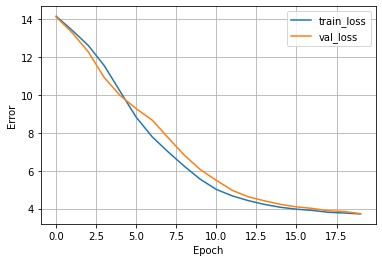

In [ ]:
# x_scaled = x
# x_scaled[['Coupon', 'Maturity','Amount Issued','Numerical Average']] = StandardScaler().fit_transform(x[['Coupon', 'Maturity','Amount Issued','Numerical Average']])
# x_np = x_scaled.to_numpy()
# y_np = np.array(y)

def plot_loss(history):
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

# train_dataset = dataset.sample(frac=0.8, random_state=0)
# test_dataset = dataset.drop(train_dataset.index)
# X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.2)

# nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),               
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),   
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),                
#     tf.keras.layers.Dense(1)
# ])

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),                    
    tf.keras.layers.Dense(1)
])

nn_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='mae')

history = nn_model.fit(
    X_train, y_train, 
    epochs=20,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

y_pred = np.squeeze(nn_model.predict(X_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = class_score(y_test, y_pred)
print(f'MSE = {mse:.5f}, R2 = {r2:.2f}, accuracy = {acc:.2f}')
plot_loss(history)
# print(y_pred)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

In [ ]:
X_train.shape
X_train[1]
type(y_np)
nn_model
y_test.shape
y_pred.shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_pred.shape)
print(history)

KeyError: ignored

In [ ]:
# zspread
# print((zspread.iat[1, 0]).dayofweek)
# print(zspread.iat[1, 0])
# droptestxd = zspread[zspread['Date'].dt.dayofweek < 5]
# droptestxd.head
print(X_train)
print(X_test)

       Coupon  Maturity  BACR  GS  ...  GBP  OTHER  Numerical Average     Delta
0   -1.513399  0.564976     0   0  ...    0      0           0.791866 -0.430197
1   -1.941518 -0.038525     0   0  ...    0      0           0.791866 -0.554081
2   -1.979293 -0.546342     0   0  ...    0      0           0.791866 -0.551335
3   -1.922631 -0.817943     0   0  ...    0      0           0.496680 -0.544622
4   -1.784122 -0.276736     0   0  ...    0      0           0.791866 -0.615718
..        ...       ...   ...  ..  ...  ...    ...                ...       ...
832  0.419431 -0.990371     1   0  ...    0      0           0.791866 -0.218587
833  0.356473 -0.986883     1   0  ...    0      0           0.791866 -0.215688
835  0.293514 -0.570761     1   0  ...    0      0           0.791866  0.268864
836  0.608307 -0.875253     1   0  ...    0      0           0.791866 -0.084023
837  0.608307 -0.860801     1   0  ...    0      0           0.791866  0.140555

[816 rows x 14 columns]
       Coupon  